# Lecture 1

* Linear regression
* Gradient Descent
* Gradient Descent for linear regression

There are a lot of useful packages in Python. We can load them in different ways. For this lecture we will use several methods from graphical packages:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display
import warnings
warnings.filterwarnings("ignore")

As you can see we can import the whole package and assign the short name for it with the command 
<pre>
```python
import name_of_the_package as short_name
```
</pre>
We can also import some functions from the package using combination 
<pre>
```python
from name_of_the_package import name_of_the_method
```
</pre>
The following command is specific for ipython notebooks: it allows to show pictures inside the notebook:

In [2]:
%matplotlib inline

Finally, we import some packages to demonstrate how to work with data and build simple linear regression model:

In [3]:
import numpy as np
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression

# Linear regression

Before training a simple linear regression model we should get some data. For this example we generate data with 100 samples and 1 feature using method ```make_regression``` from the package ```sklearn.datasets```.  

In [4]:
X_train,y_train = ds.make_regression(n_samples=100, 
                                     n_features=1, 
                                     n_informative=1, 
                                     noise=20.0, 
                                     bias=50, 
                                     random_state=2016)
y_train = y_train/10 # scale target to have nicer pictures

To visualize the data we use method ```plot``` from the ```matplotlib``` package.

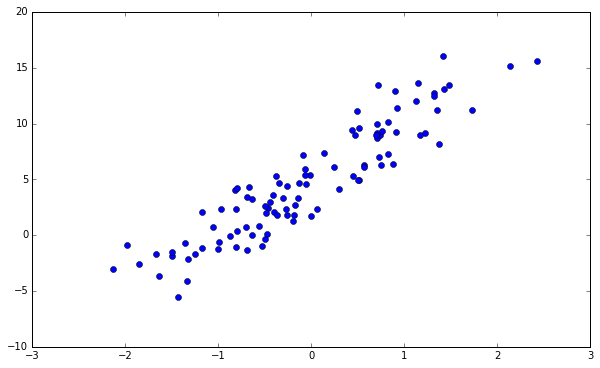

In [5]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0],y_train,'o')
plt.show()

Now we build our first model using the method ```LinearRegression``` from the package ```scikit-learn```. Notice that when you work with ```scikit-learn``` training different models is very similar. Usually, training contains the following steps:
1. Create a class for the model and define all parameters
2. Use the method fit to train the model on the training examples
3. Use the method predict or predict\_proba to obtain predictions on the test examples.

In our example we do not have any test examples, that is why we train the linear regression model and obtain the coefficients from our model.

In [6]:
model = LinearRegression() # create an object of the LinearRegression class
model.fit(X_train,y_train) # train the model on the training examples
intercept = model.intercept_
slope = model.coef_[0]
best_fit = X_train[:,0] * slope + intercept
print "Parameters thetas: " + str(round(model.intercept_,2)) +\
      ", " + ", ".join([str(round(x,2)) for x in model.coef_])

Parameters thetas: 4.98, 4.83


Finally, we visualize our data along with the regression line.

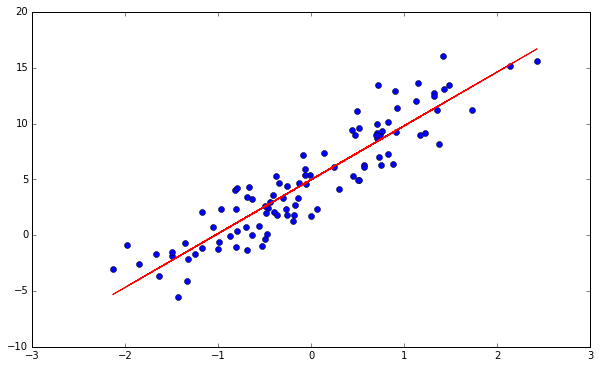

In [7]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0],y_train,'o')
line, = ax.plot([], [], lw=2)
plt.plot(X_train[:,0], best_fit, 'k-', color = "r")
plt.show()

# Gradient Descent

The idea of Gradient Descent is to change $x$ by small value in the direction of the gradient. Consider some quadratic function, for example, 
$$
f(x) = x^2 - 6x + 5
$$

Local minimum occurs at 3.05.



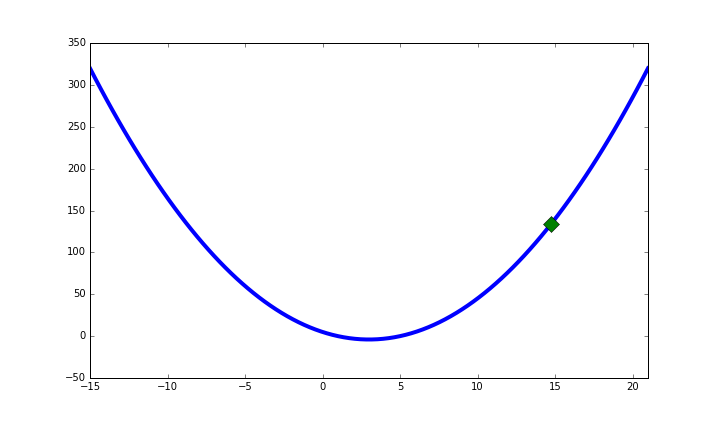
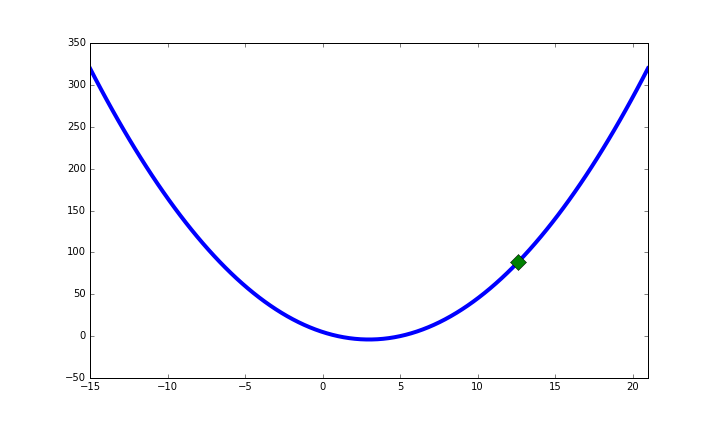
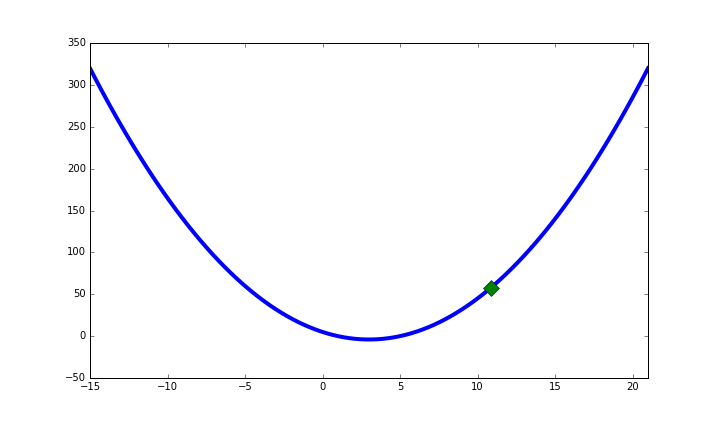
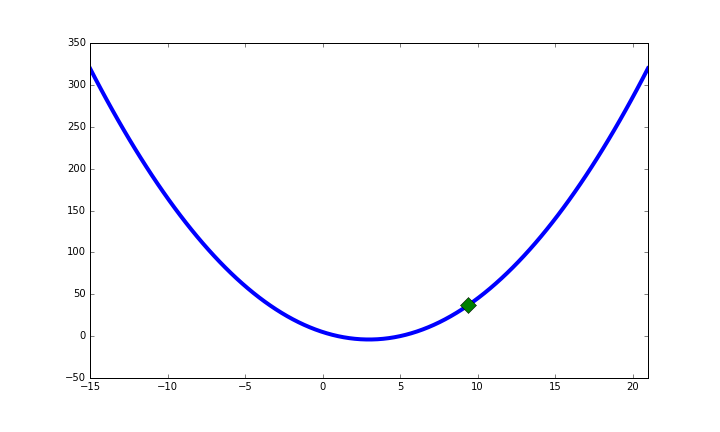
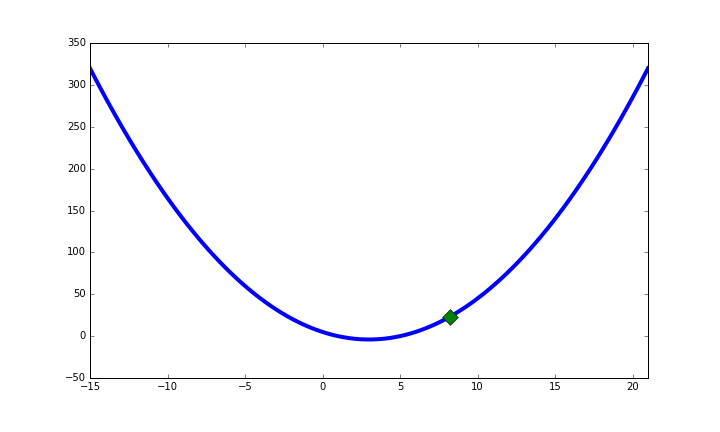
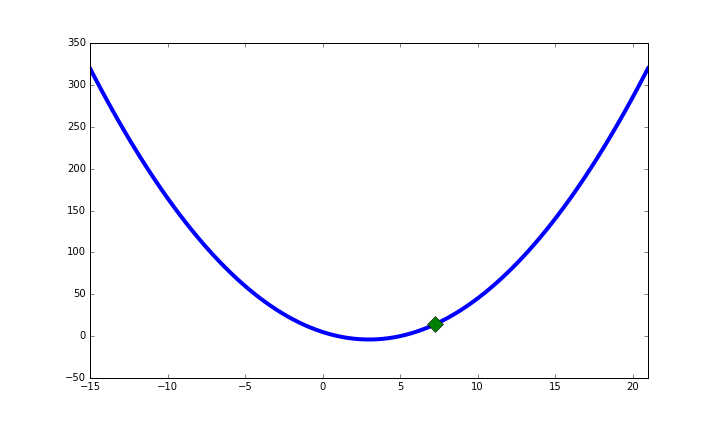
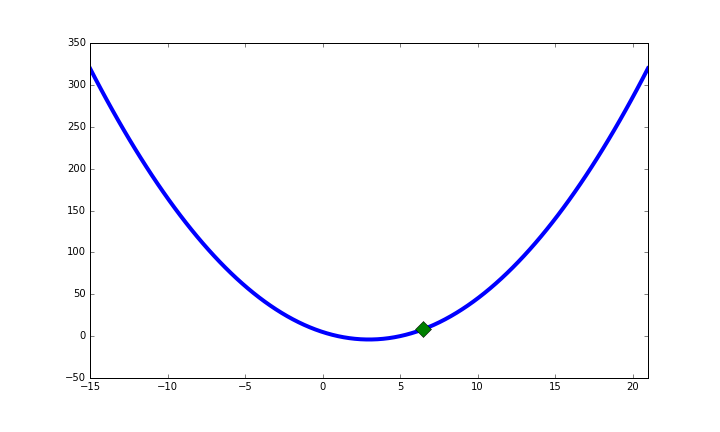
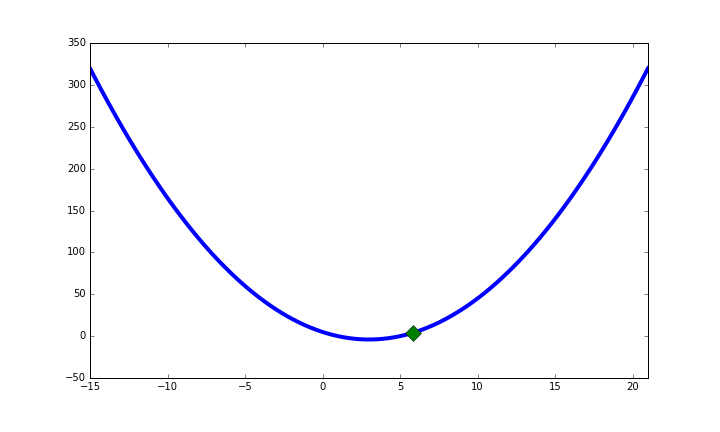
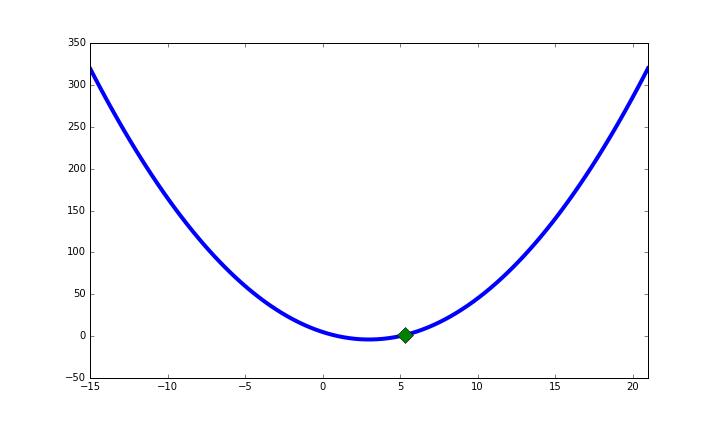
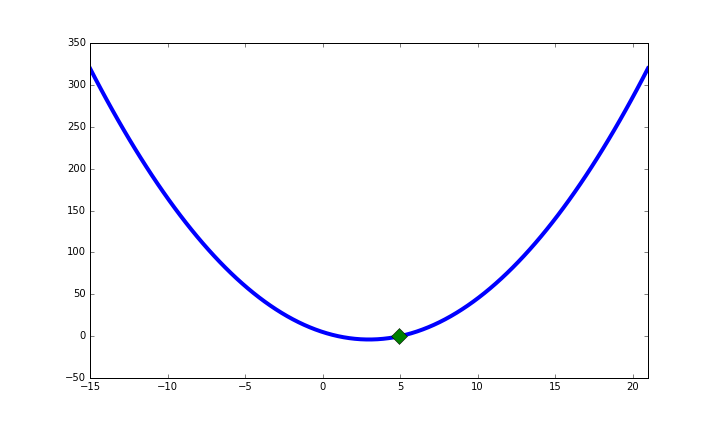
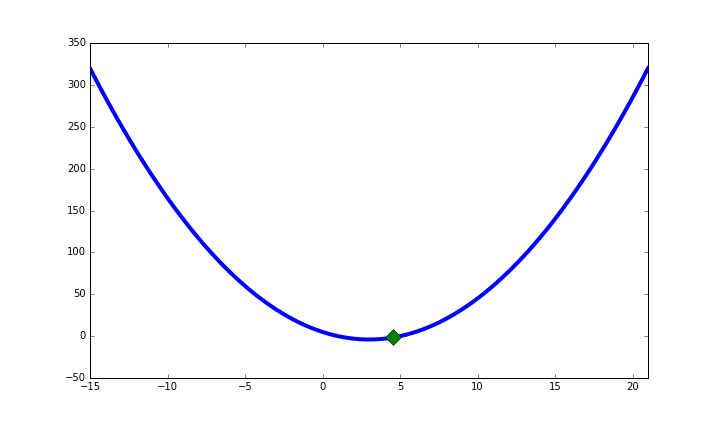
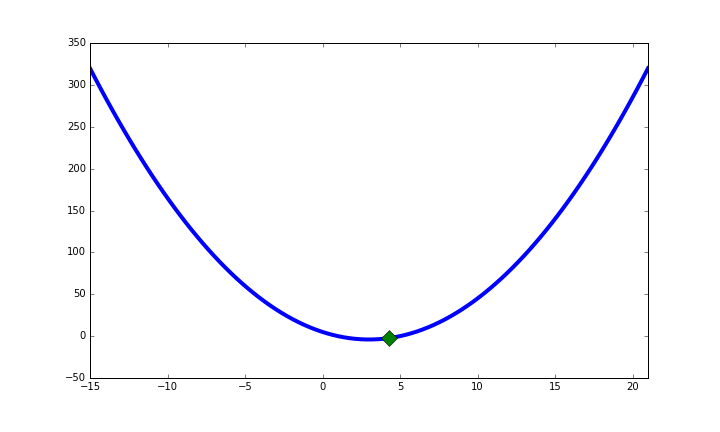
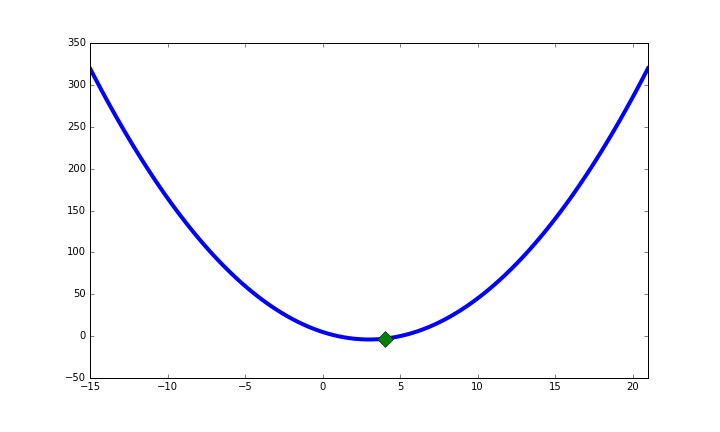
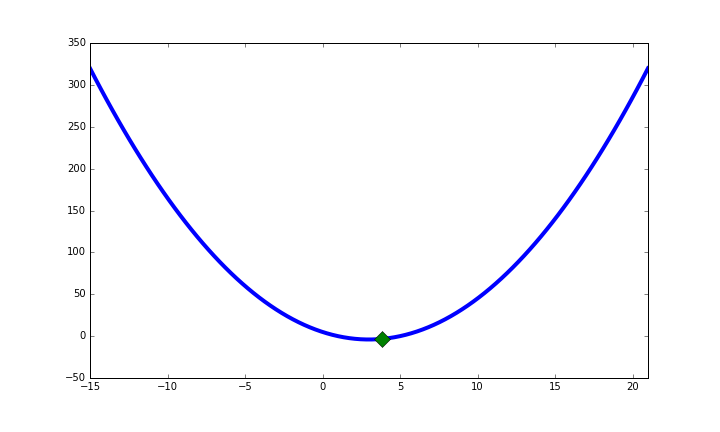
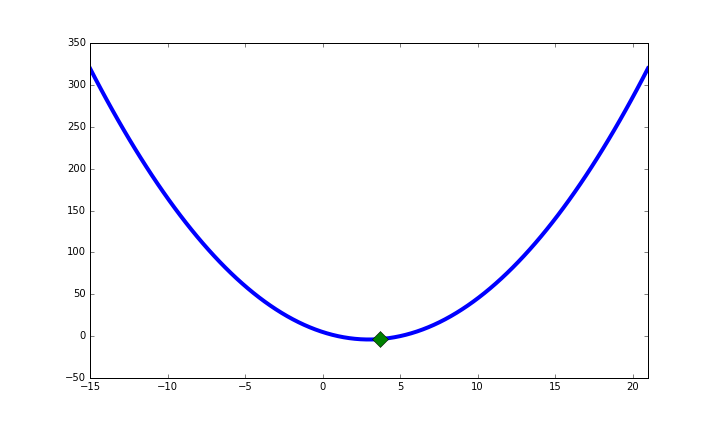
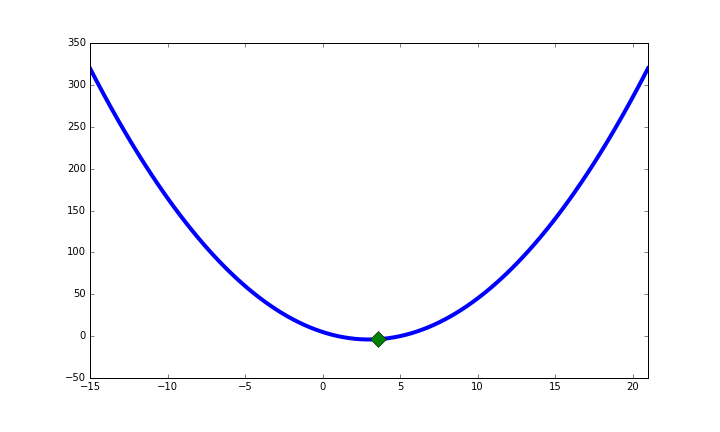
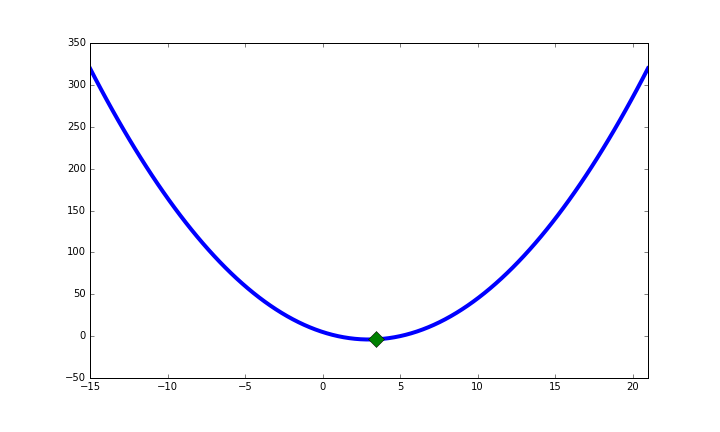
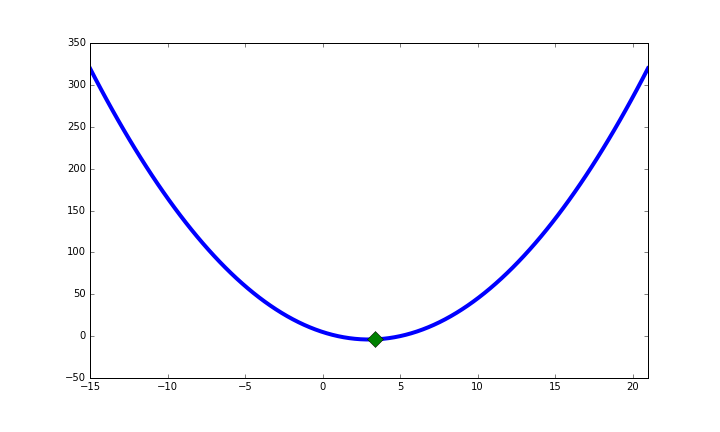
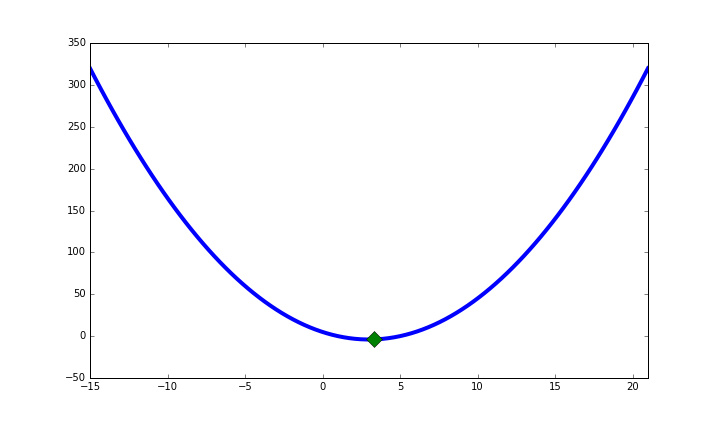
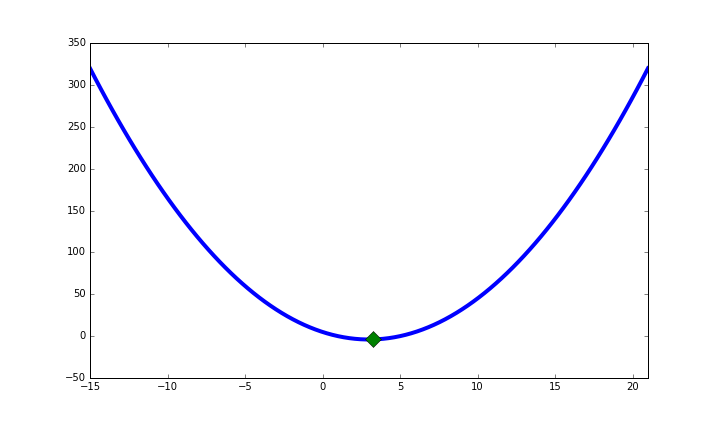
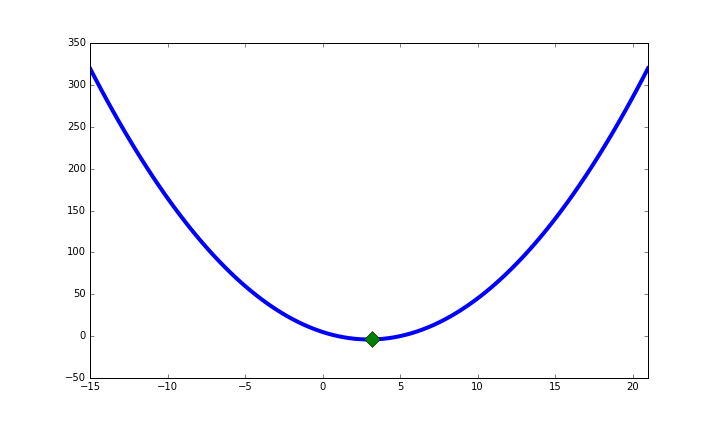
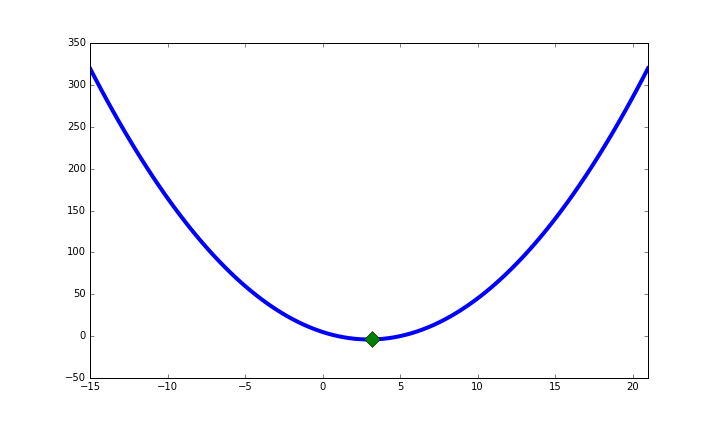
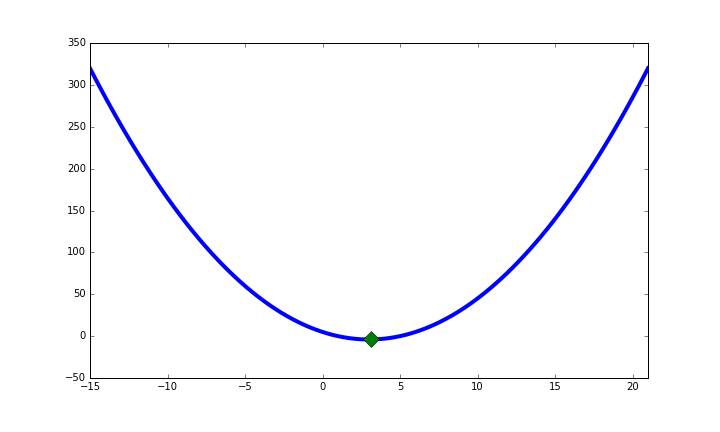
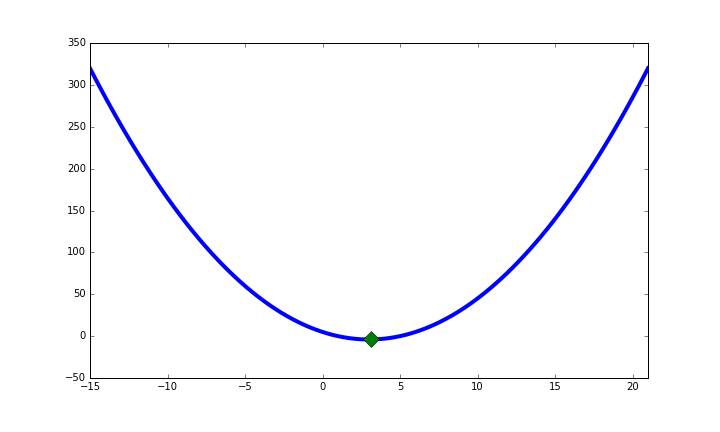
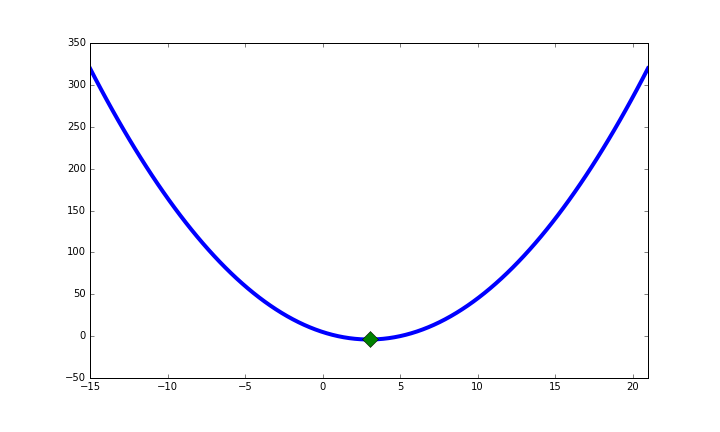
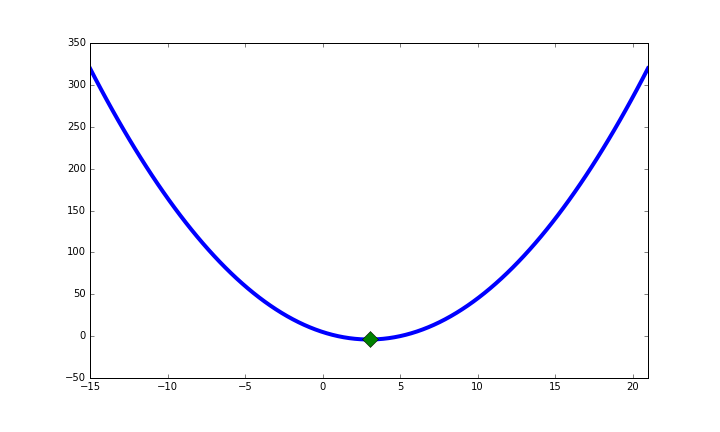
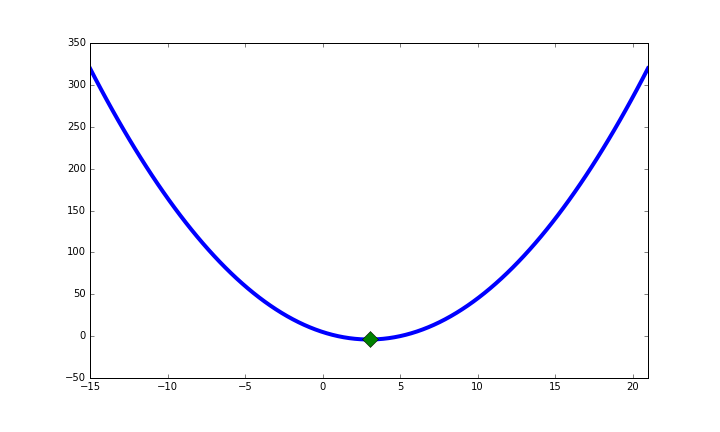
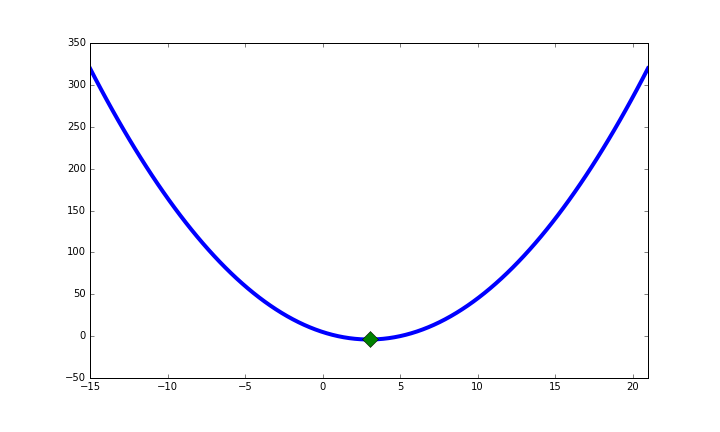

In [8]:
# functions for animation
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n, y_n)
    return line,

# function we want to optimize
def f(x):
    return x**2 - 6*x + 5

# derivative of the optimized function
def f_derivative(x):
    return 2*x -6

x = np.linspace(-15,21,100)  #x values
y = f(x)                     #function values
old_min = 0                  #previous minimum
temp_min = 15                #current minimum
step_size = 0.01             #learning rate
precision = 0.001            #stopping criteria
 
mins = [] #array for minima
cost = [] #array for errors
while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    # we calculate an error because we know the actual minimum
    cost.append((3-temp_min)**2) 
    mins.append(temp_min)
 
print("Local minimum occurs at {}.".format(round(temp_min,2)))

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-15, 21), ylim=(-50, 350))
ax.plot(x, y, linewidth=4)
line, = ax.plot([], [], "D", markersize=12)
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(mins[0::10]), interval=200)

We can apply Gradient Descent for the function of many variables, for example, 
$$
z = x^2 + y^2.
$$

First, we visualize this function.

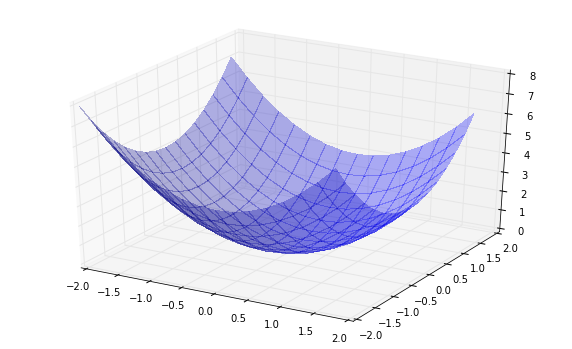

In [9]:
def f(a,b):
    return a**2 + b**2

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

plt.show()

The Gradient Descent algorithm for this function can be implemented as follows:

In [10]:
def gradient_descent(theta0, iters, alpha):
    history = [theta0] # to store all thetas
    theta = theta0     # initial values for thetas
    # main loop by iterations:
    for i in range(iters):
        # gradient is [2x, 2y]:
        gradient = [2.0*x for x in theta] 
        # update parameters:
        theta = [a - alpha*b for a,b in zip(theta, gradient)]
        history.append(theta)
    return history

There are several parameters for this function: ```theta0``` is an initial guess for minimum, ```iters``` is a number of iterations, ```alpha``` is a learning rate. In the next code we call this function and plot the results after each iteration.

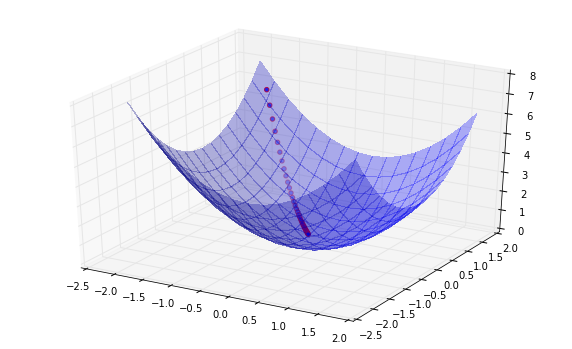

In [11]:
history = gradient_descent(theta0 = [-1.8, 1.6], iters = 30, alpha = 0.03)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c = f(a,b)
ax.scatter(a, b, c, color="r"); 

plt.show()

Unfortunately, if the function has many extrema, then the Gradient Descent could find the local minimum instead of global minimum. One trick is to overcome this disadvantage is to run SGD several times with different initial guessed values for $x$. Here is an example of function where Gradient Descent could be not effective:

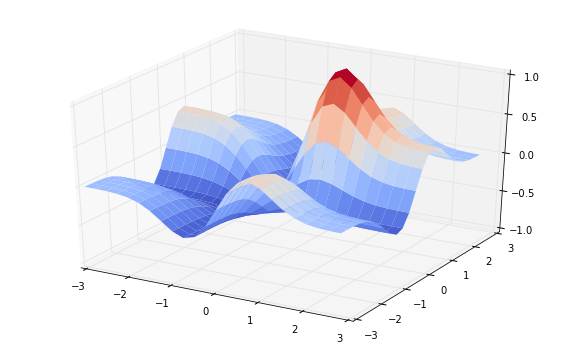

In [12]:
def f(a,b):
    return 2*a*b*np.exp(-a**2 - b**2) + a*np.exp(-a**2) + b*np.exp(-b**2)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-3, 3, 0.25)
b = np.arange(-3, 3, 0.25)
a, b = np.meshgrid(a, b)
c = f(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)
ax.set_zlim(-1.01, 1.01)

plt.show()

# Gradient Descent for Linear Regression (one feature)

For the linear regression we consider the cost function 
$$
J(\theta) = \dfrac{1}{2} \sum\limits_{i=1}^{m} (h_{\theta} (x^{(i)}) - y^{(i)})^2.
$$ 
For one feature problem this function becomes two variable function, because we need to add the bias term to the set of features. We complete this step by adding the column of 1's to the matrix $X$.

In [13]:
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

We can visualize our cost function $J(\theta)$:

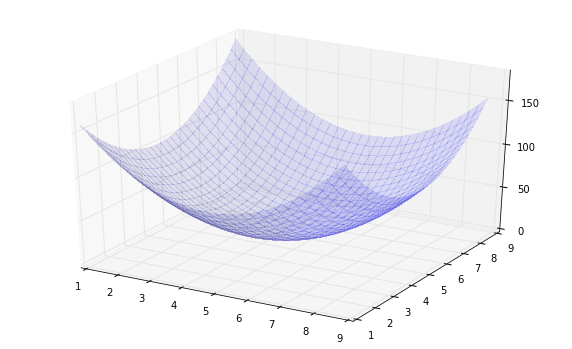

In [14]:
def cost_function(x, y, theta):
    y = y.reshape((-1,1))
    theta = np.array(theta).reshape((2,-1))
    return np.sum((np.dot(x, theta) - y) ** 2, axis=0)/(2*10)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(1, 9, 0.25)
b = np.arange(1, 9, 0.25)
a, b = np.meshgrid(a, b) # make a grid of values from a and b
# we use some vectorization to speed up the calculations
c = cost_function(X_train_bias, y_train, np.c_[a.ravel(), b.ravel()].T).reshape(a.shape)

surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

plt.show()

To compare the Batch and Stochastic Gradient Descents we will implement it separately.

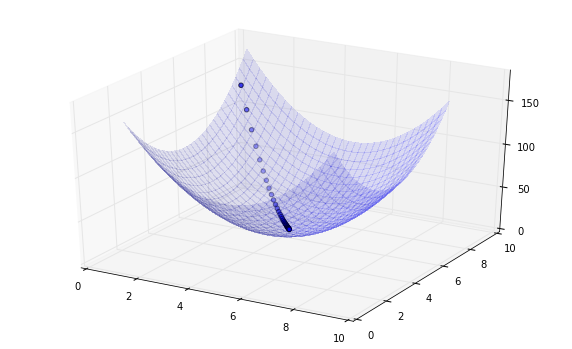

In [15]:
def batch_gradient_descent(x, y, theta0, iters, alpha):
    theta = theta0    # initial values for theta's
    history = []      # array of theta's    
    costs = []        # array of costs
    # main loop by number of iterations:
    for i in range(iters):
        history.append(theta)
        cost = cost_function(x, y, theta)[0]
        costs.append(cost)
        pred = np.dot(x, theta)
        error = pred - y 
        gradient = x.T.dot(error)
        theta = theta - alpha * gradient  # update
    return history, costs

history, costs = batch_gradient_descent(X_train_bias, y_train, 
                                        theta0 = [1.2, 8], 
                                        iters = 30, 
                                        alpha = 0.001)
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

t0 = np.array([x[0] for x in history])
t1 = np.array([x[1] for x in history])
ax.scatter(t0, t1, costs, color="k"); 

plt.show()

As you can see, the algorithm found the fastest path to the minimum. Stochastic Gradient Descent does not find the shortest path, but in most cases it is much faster because it does not use all training examples to update the parameters:

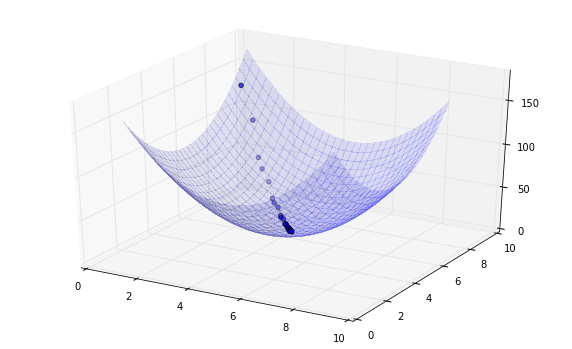

In [16]:
def stochastic_gradient_descent(x, y, theta0, iters, alpha):
    theta = theta0    # initial values for theta's
    history = []      # array of theta's    
    costs = []        # array of costs
    m = y.size        # number of training examples
    # main loop by number of iterations:
    for i in range(iters):
        for j in range(m):
            pred = np.dot(x[j,:], theta)
            error = pred - y[j]
            gradient = error * x[j,:]
            theta = theta - alpha * gradient  # update
            if j % 40 == 0: 
                history.append(theta)
                cost = cost_function(x, y, theta)[0]
                costs.append(cost)
    return history, costs

history, costs = stochastic_gradient_descent(X_train_bias, y_train, 
                                             theta0 = [1.2, 8], 
                                             iters = 10, 
                                             alpha = 0.005)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

t0 = np.array([x[0] for x in history])
t1 = np.array([x[1] for x in history])
ax.scatter(t0, t1, costs, color="k"); 

plt.show()

When we apply the Gradient Descent algorithm to the linear regression our straight line gradually approaching to the line which fits our data in the best way. We apply the above method ```batch_gradient_descent``` to fit the coefficients in the linear regression.

In [17]:
alpha = 0.001             # learning rate
iters = 100               # number of iterations
theta = np.random.rand(2) # initial guess for theta's
history, cost = batch_gradient_descent(X_train_bias, y_train, theta, iters, alpha)
theta = history[-1]
print "Parameters thetas after gradient descent: " + ", ".join([str(round(x,2)) for x in theta])
best_fit_gradient_descent = theta[0] + X_train[:,0] * theta[1]

Parameters thetas after gradient descent: 4.98, 4.82


Notice that the parameters from the manual implementation are very close to the parameters from ```scikit-learn```. The animated plot how the Gradient Descent for the linear regression works:


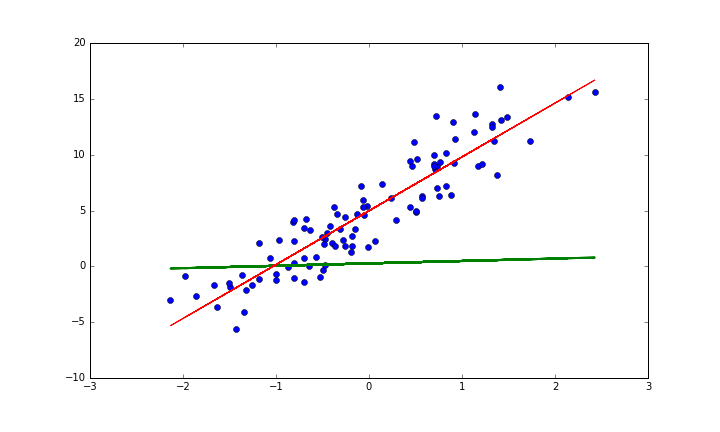
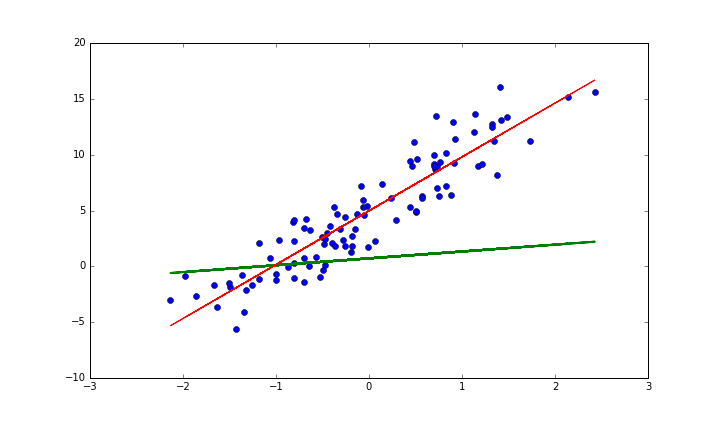
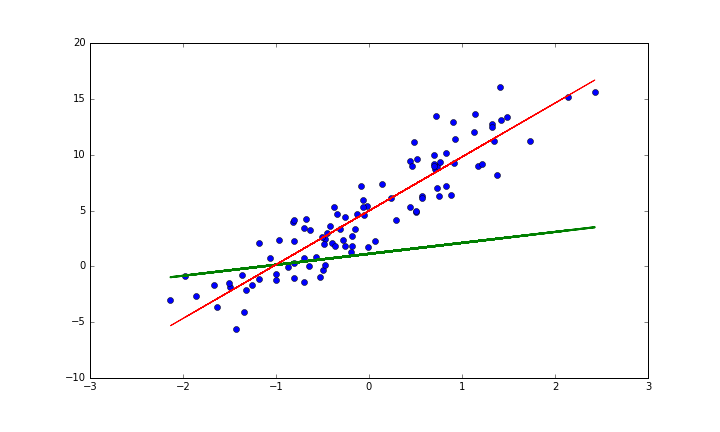
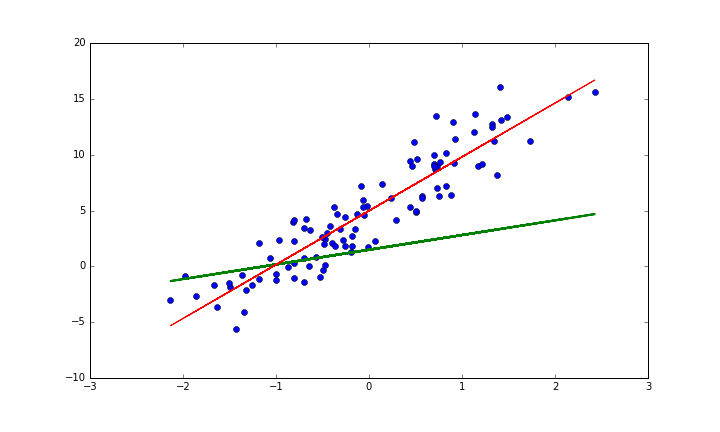
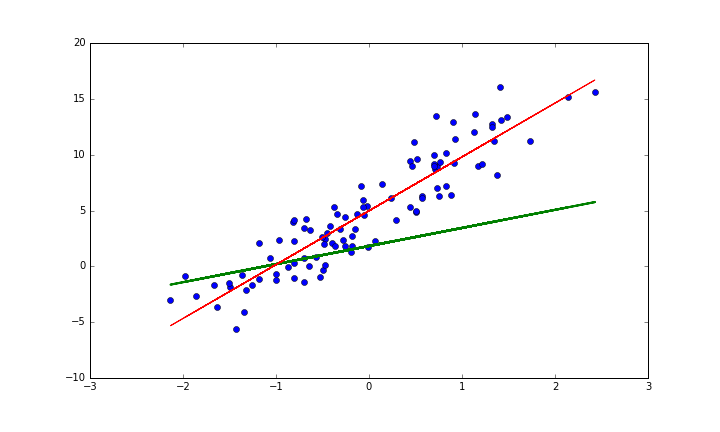
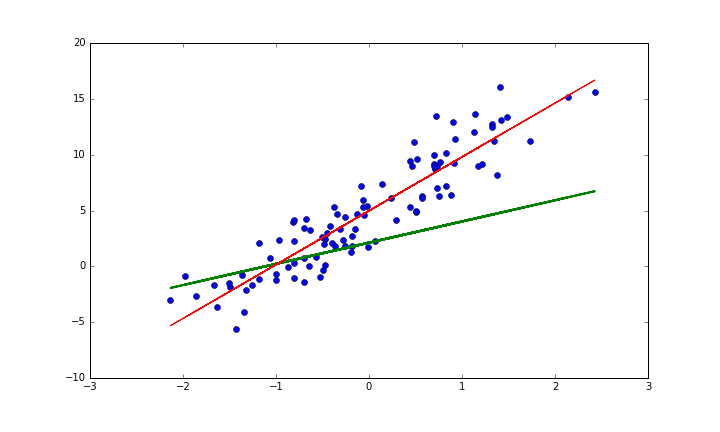
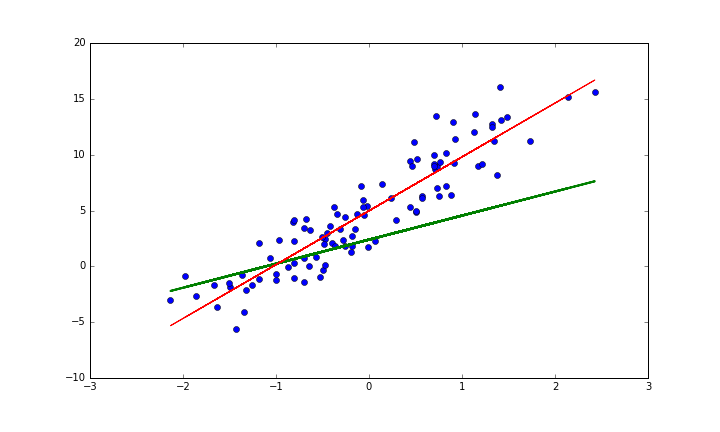
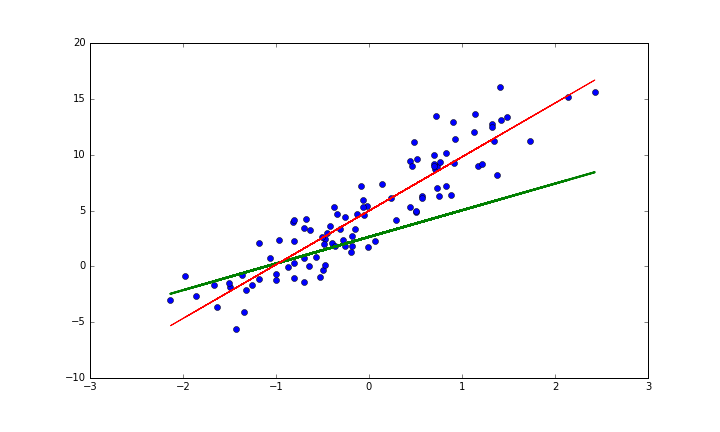
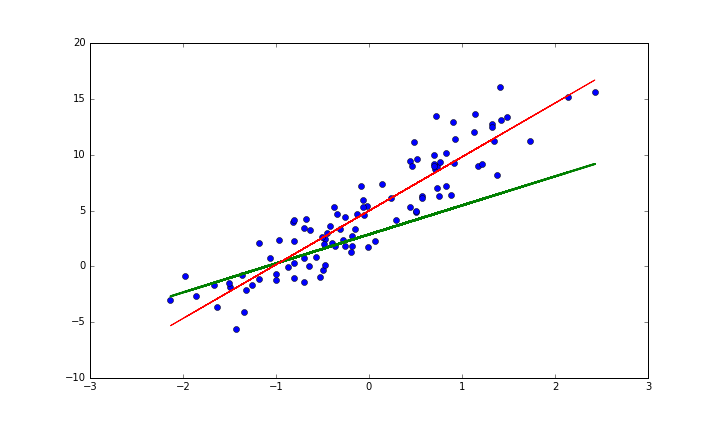
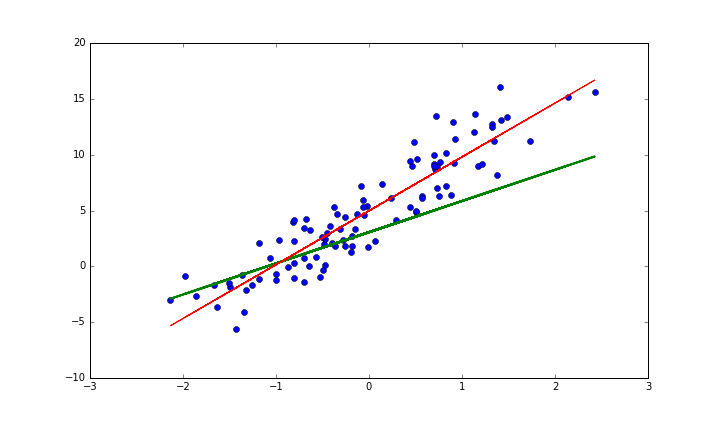
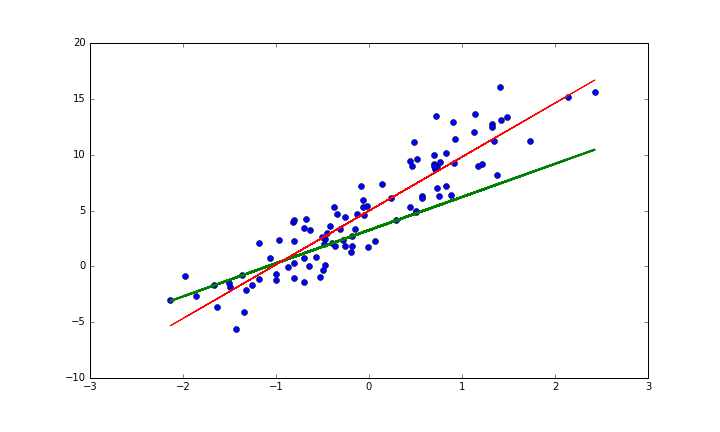
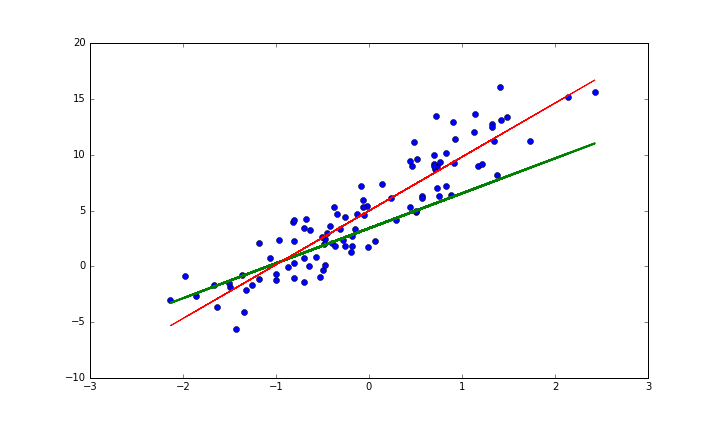
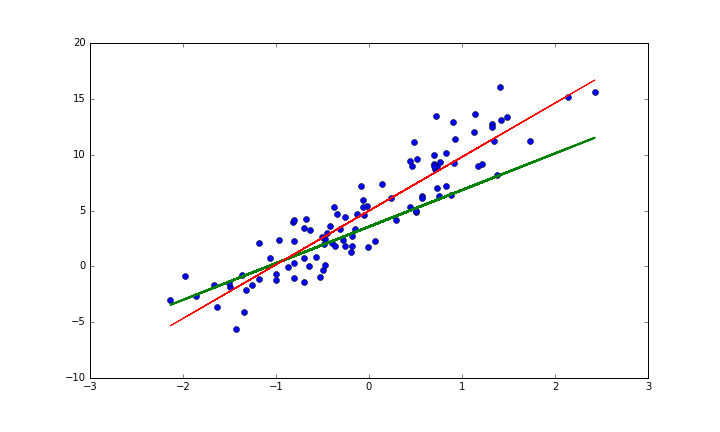
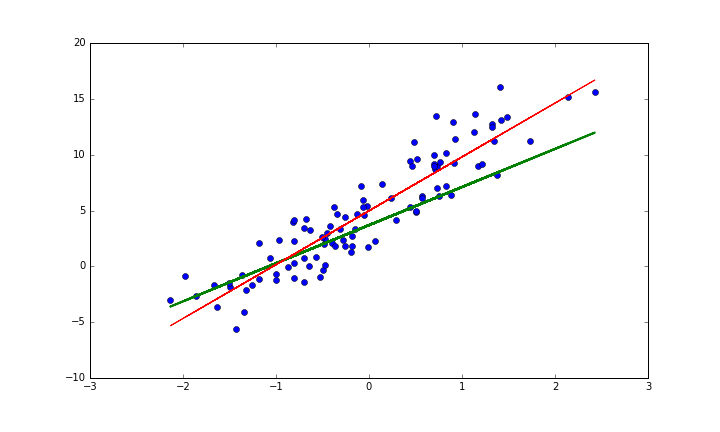
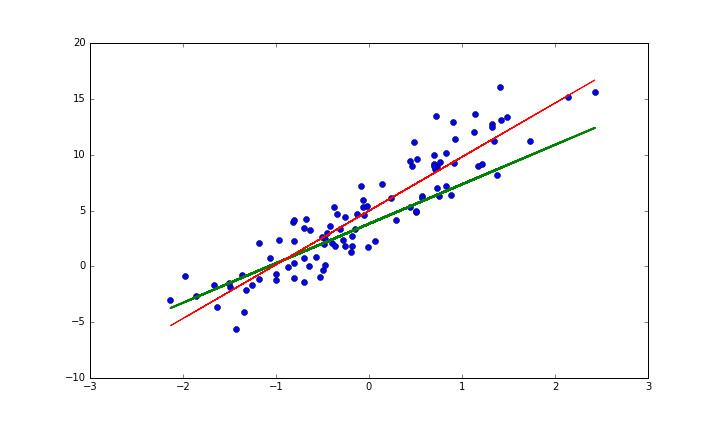
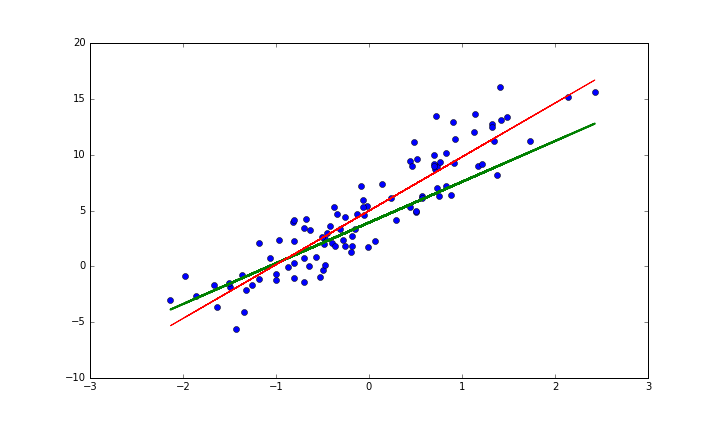
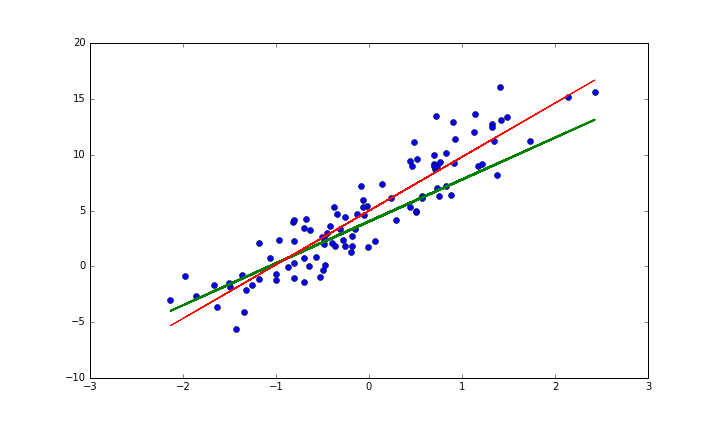
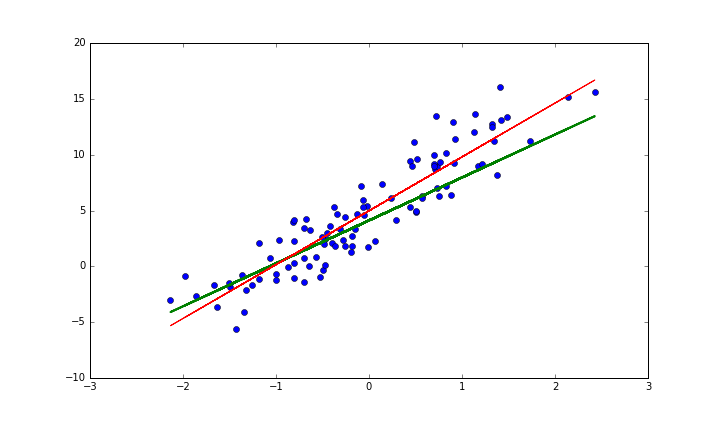
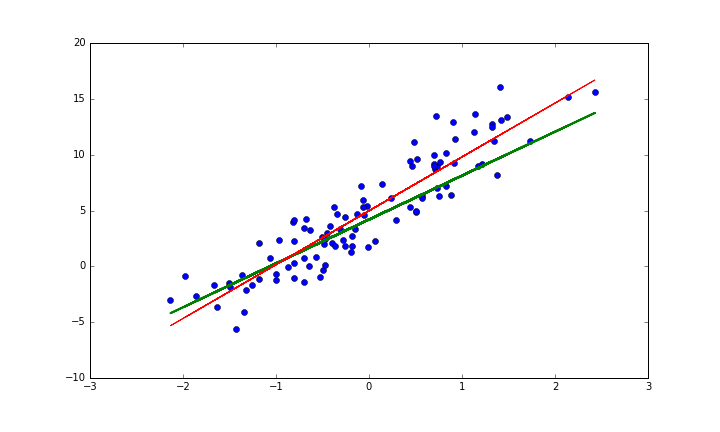
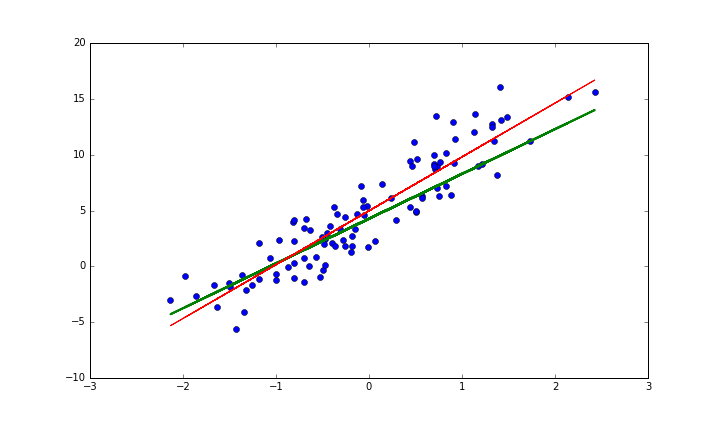
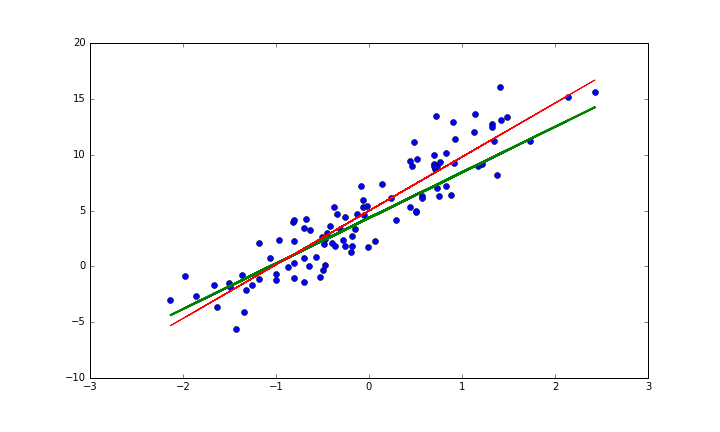
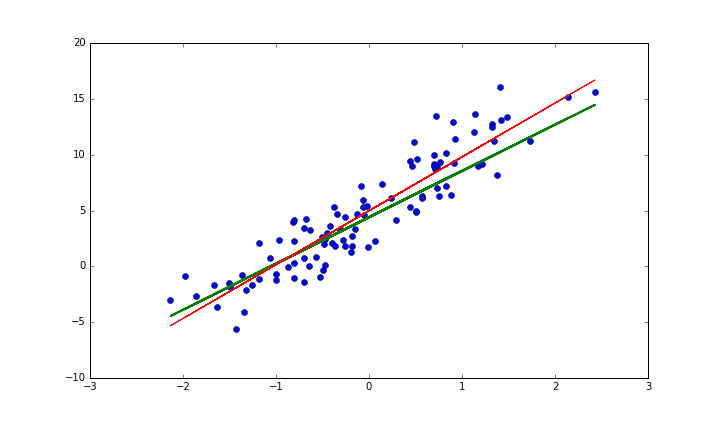
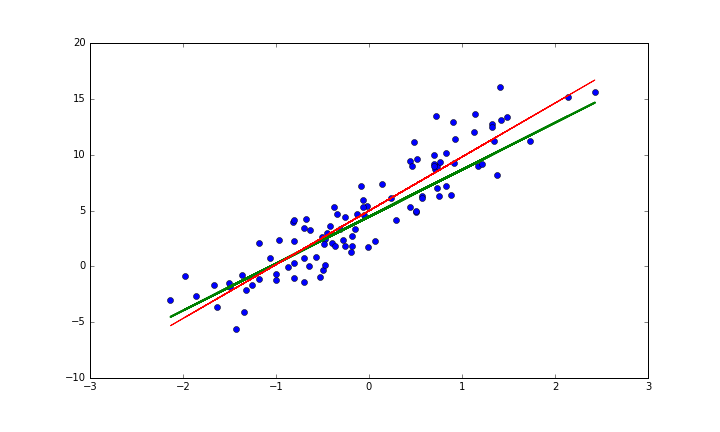
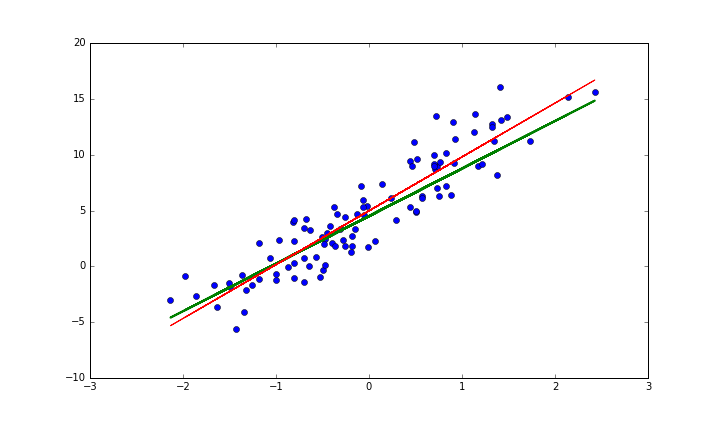
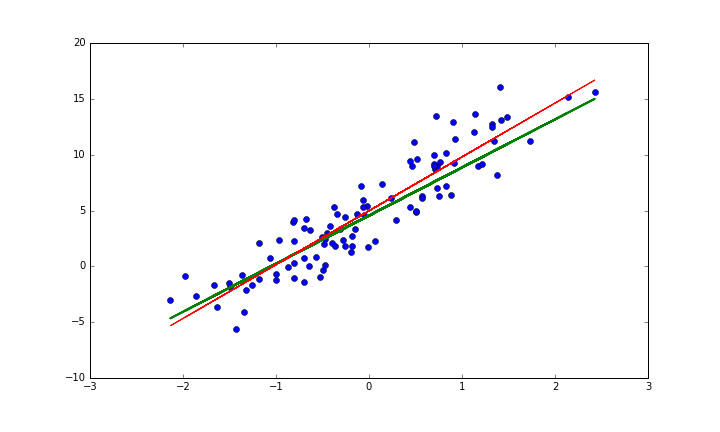
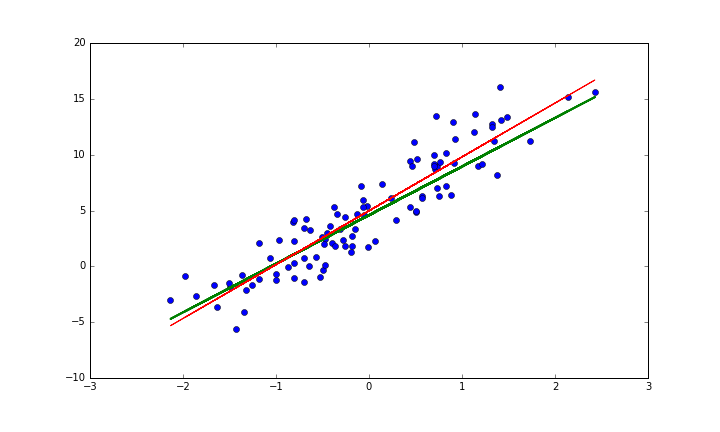
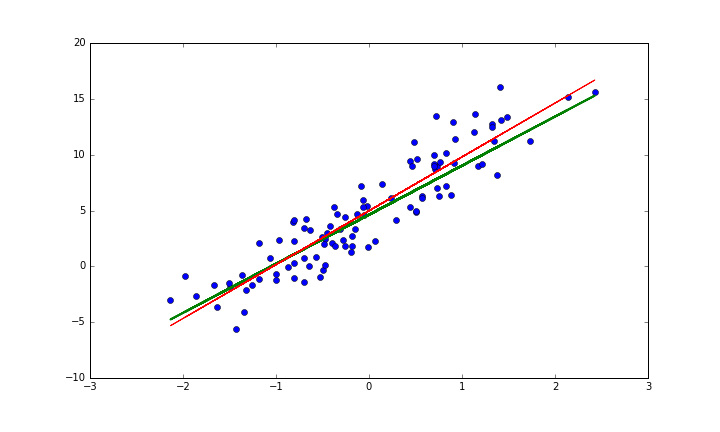
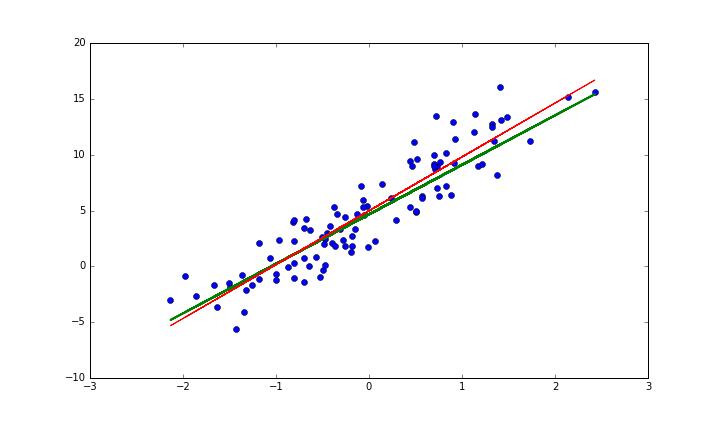
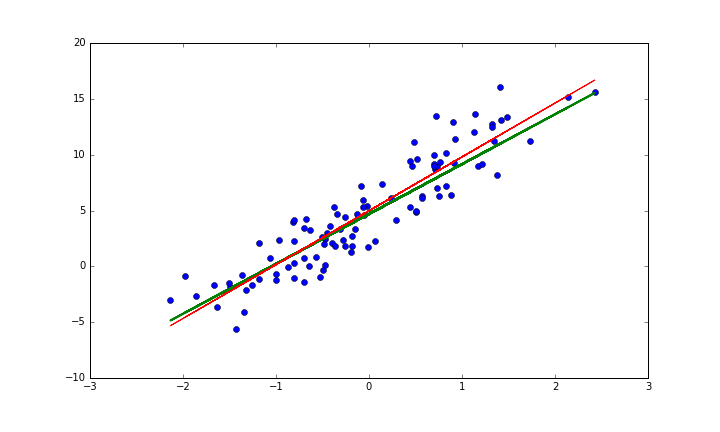
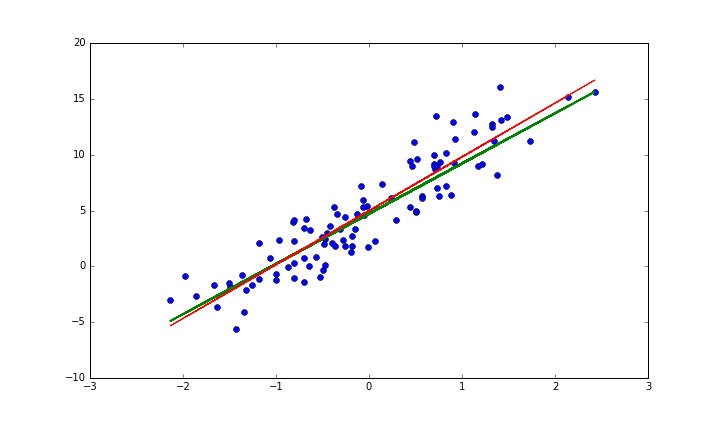
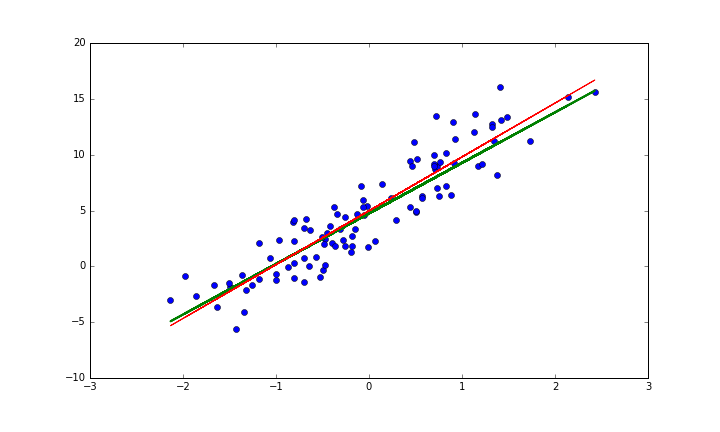
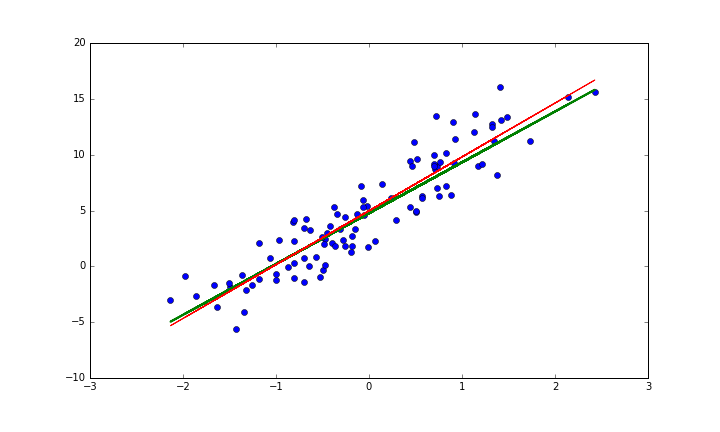
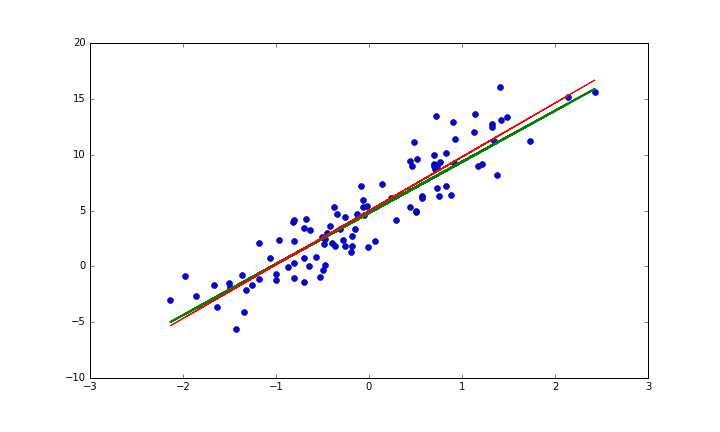
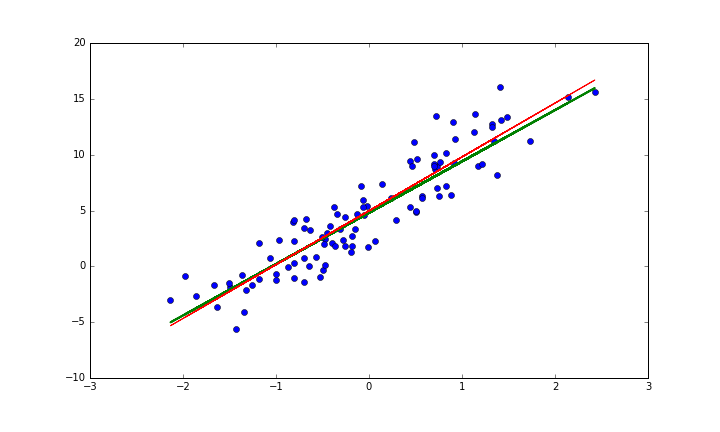
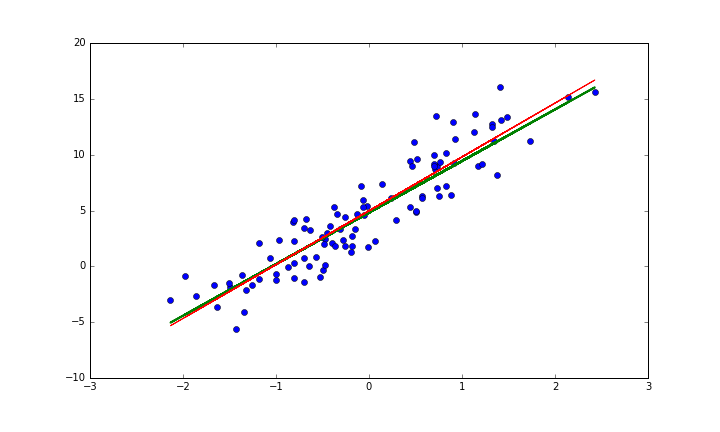
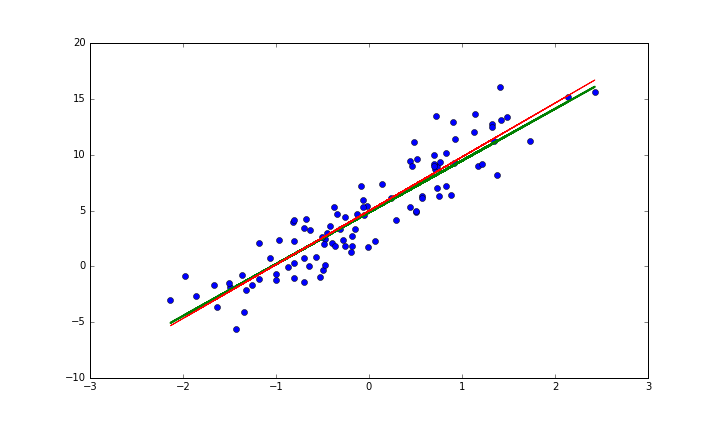
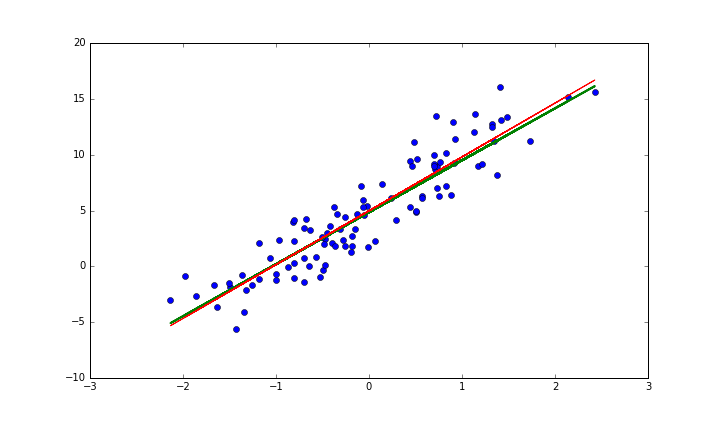
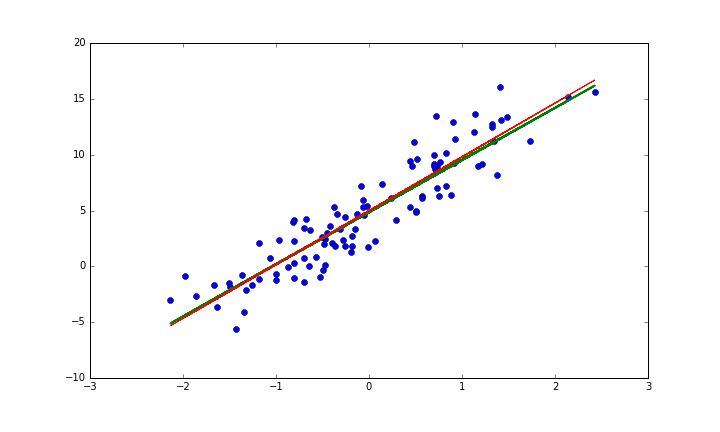
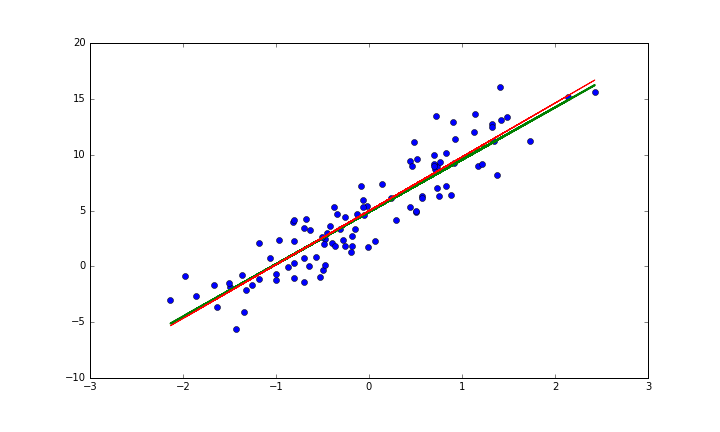
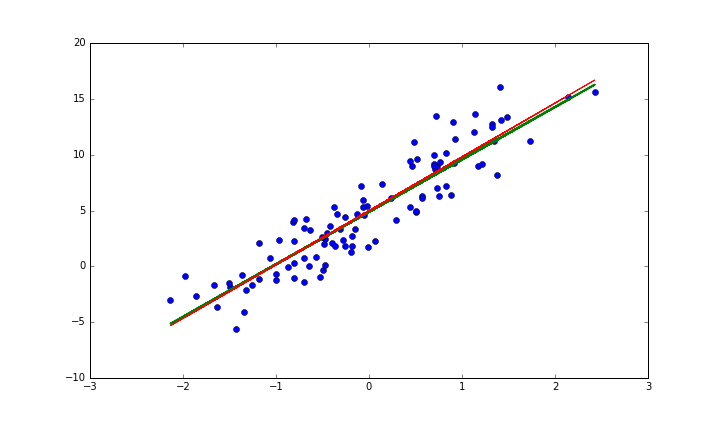
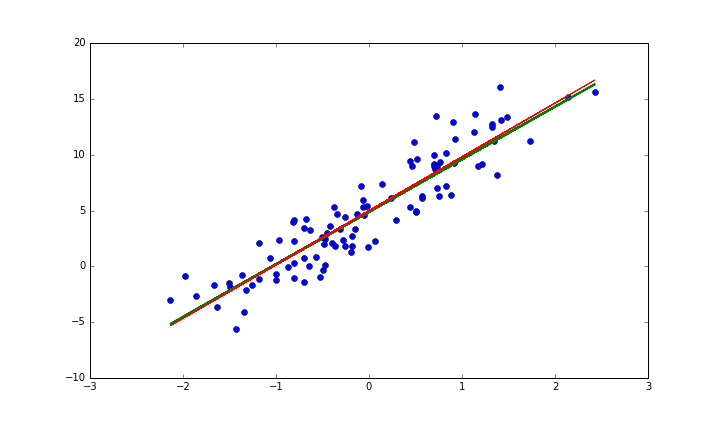
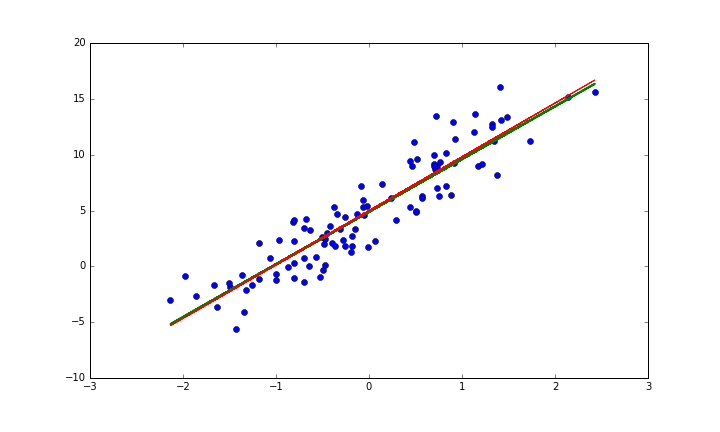
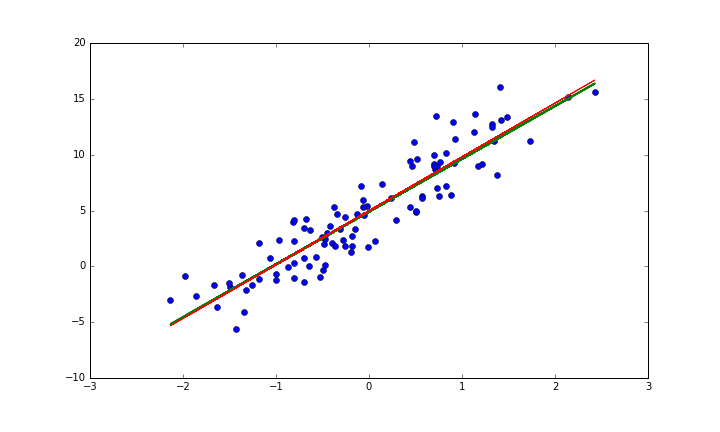
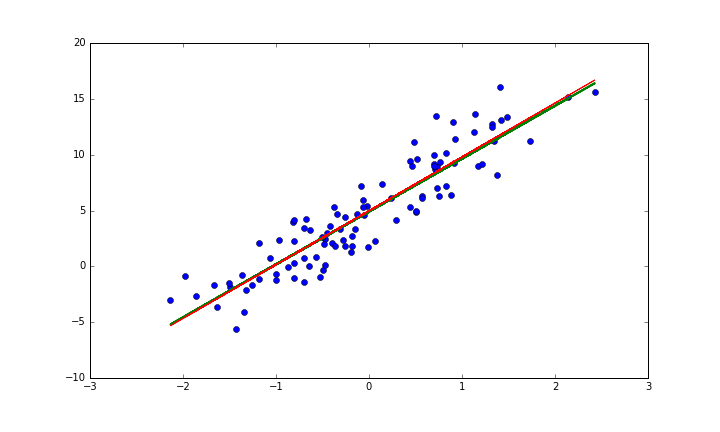
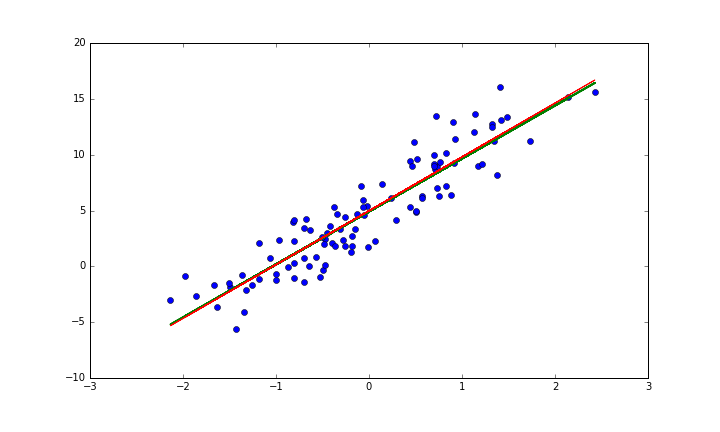
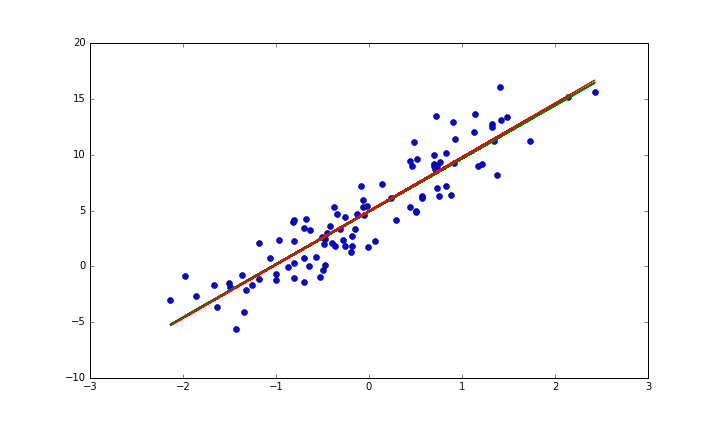
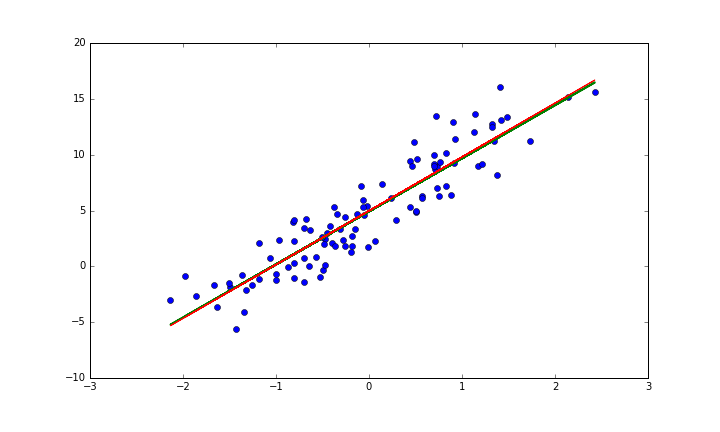
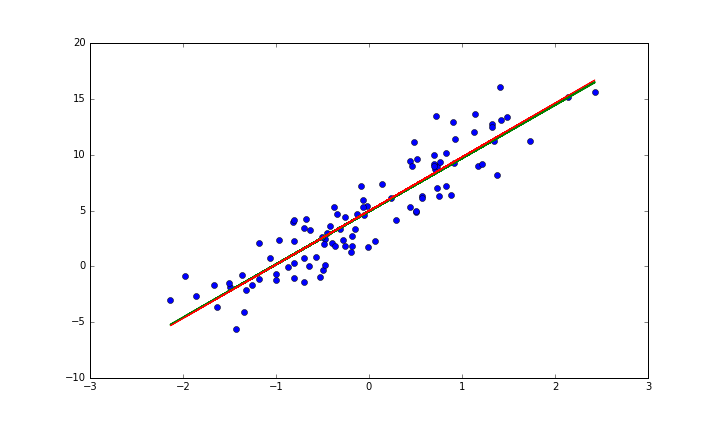
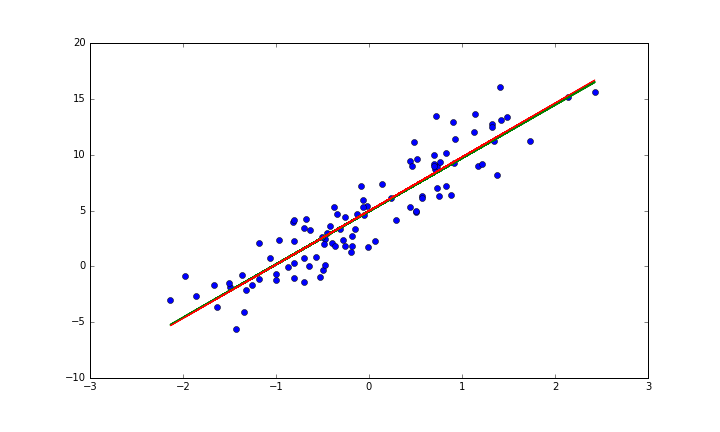
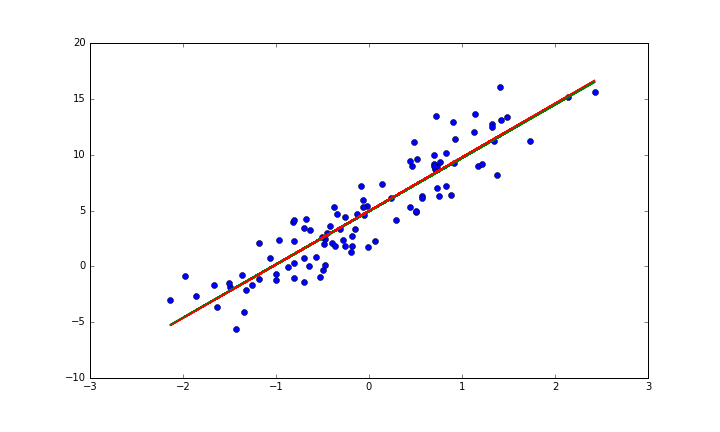
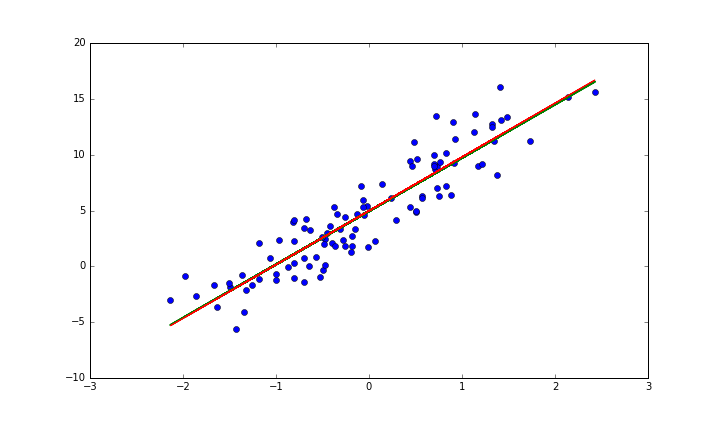
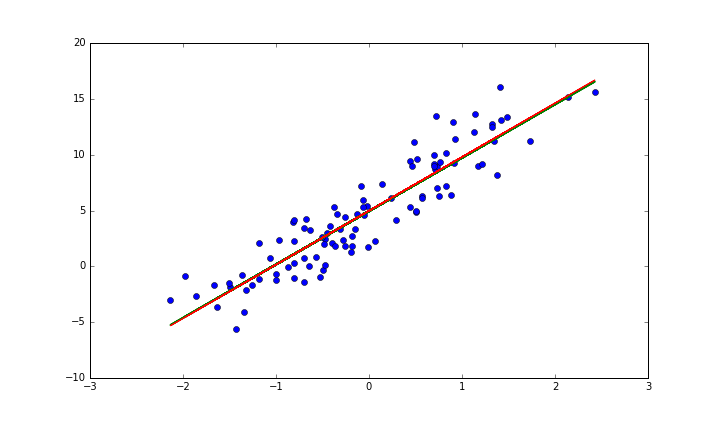
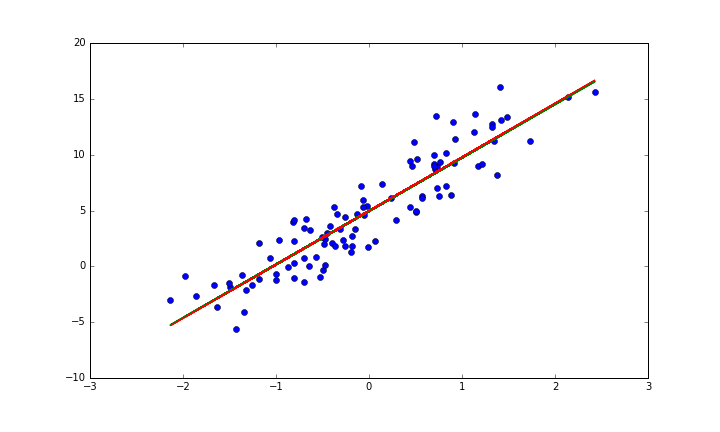
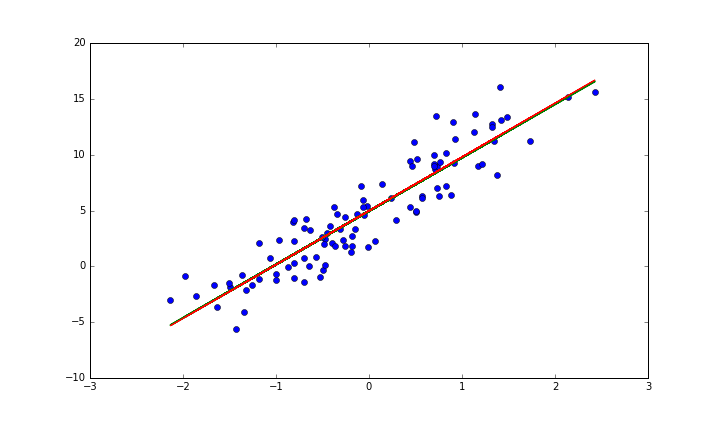
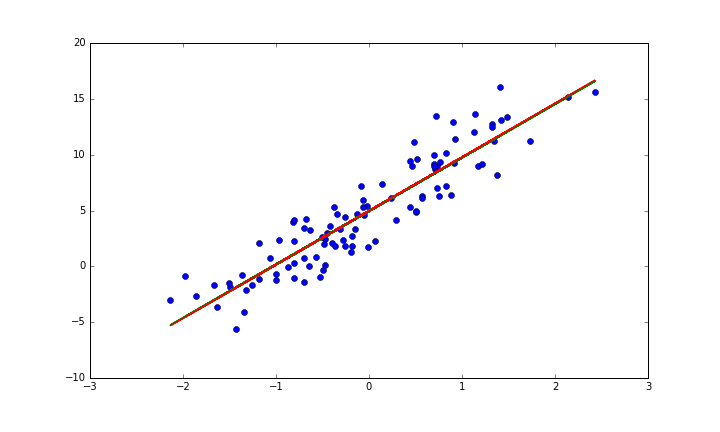
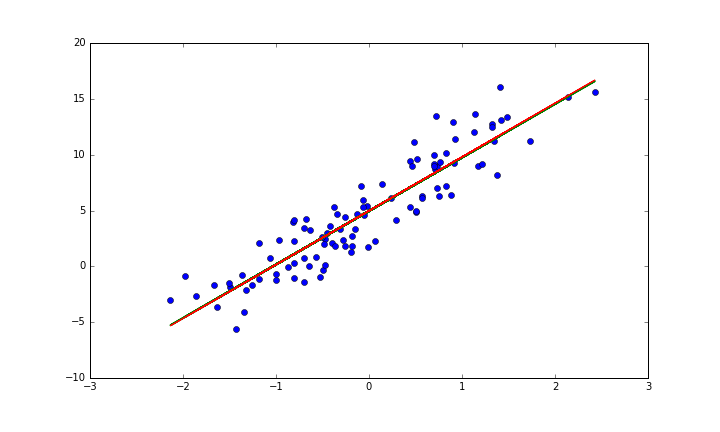
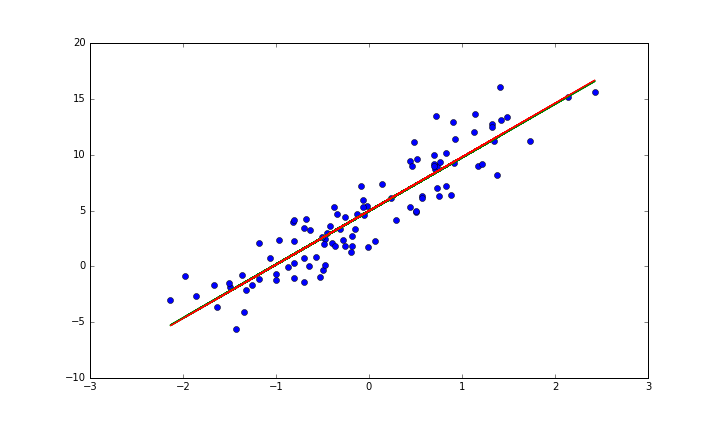
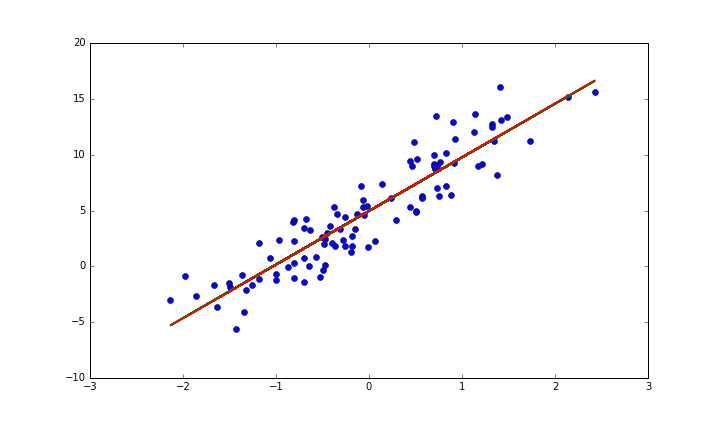
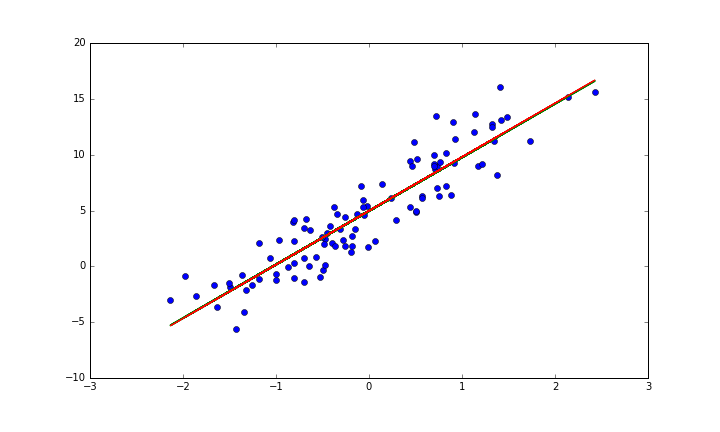
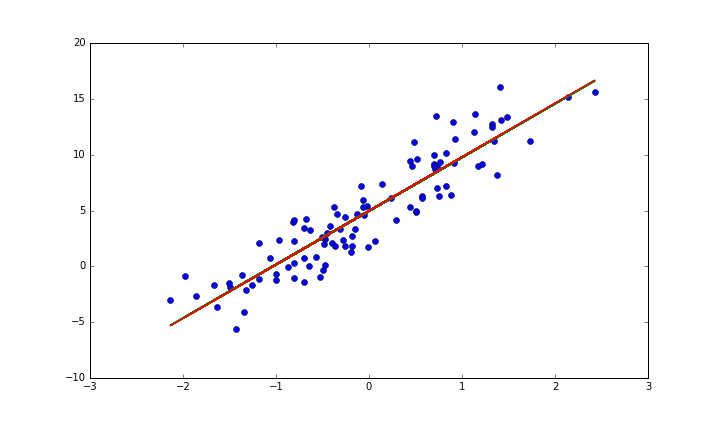
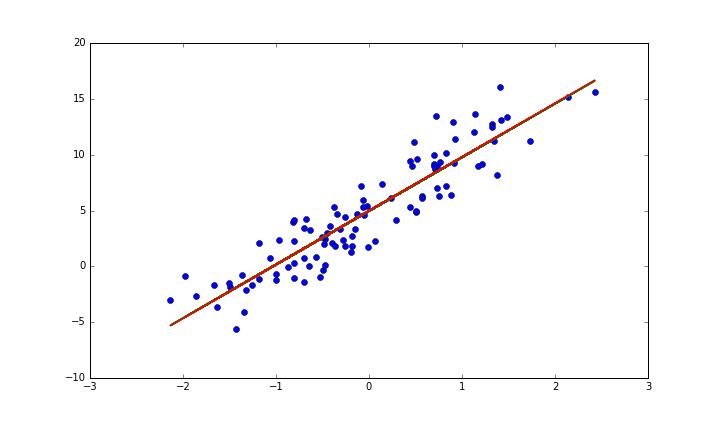
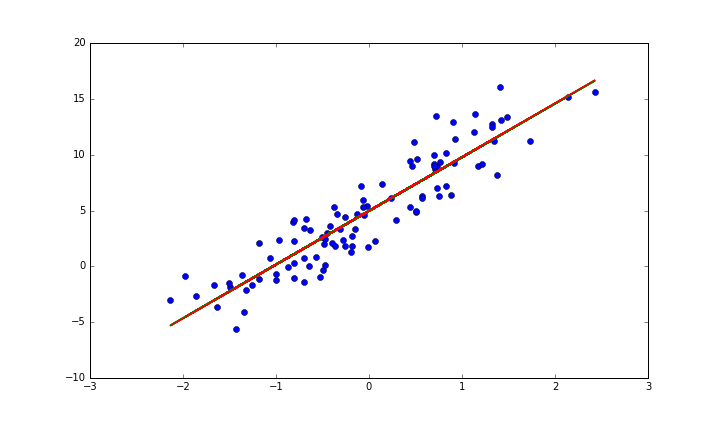
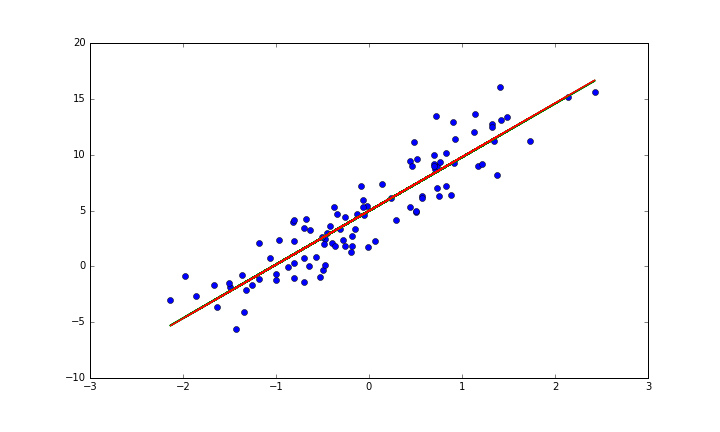
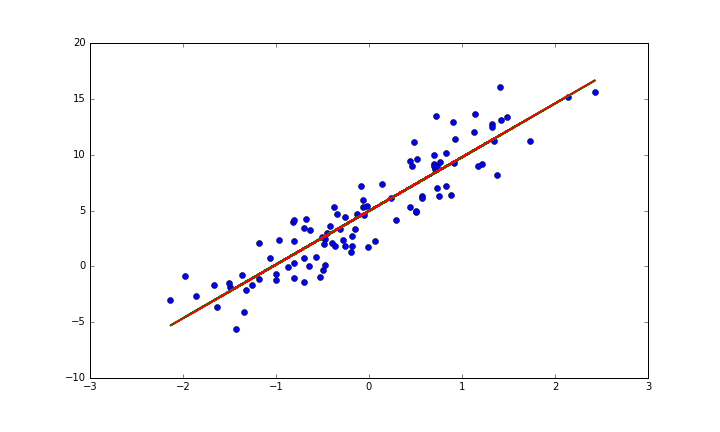
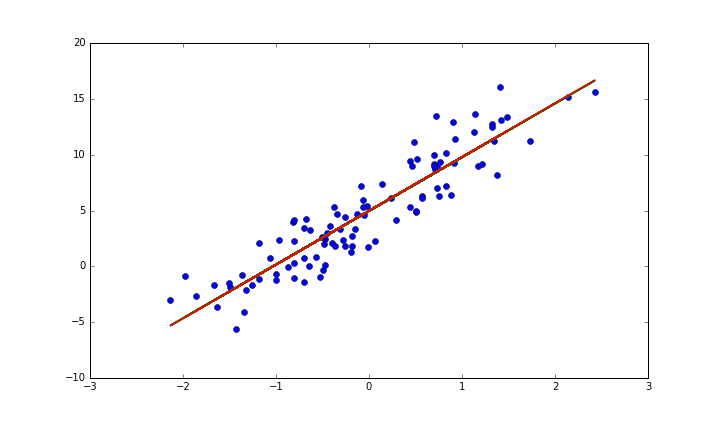
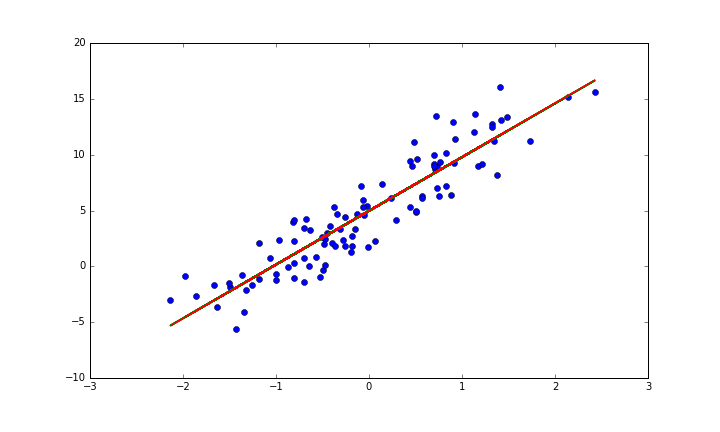
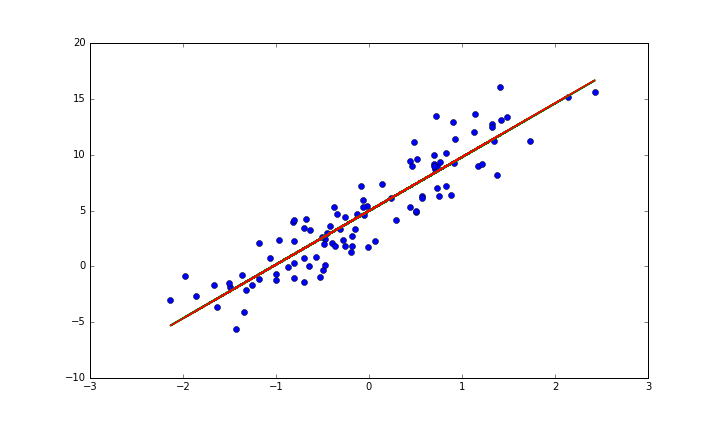
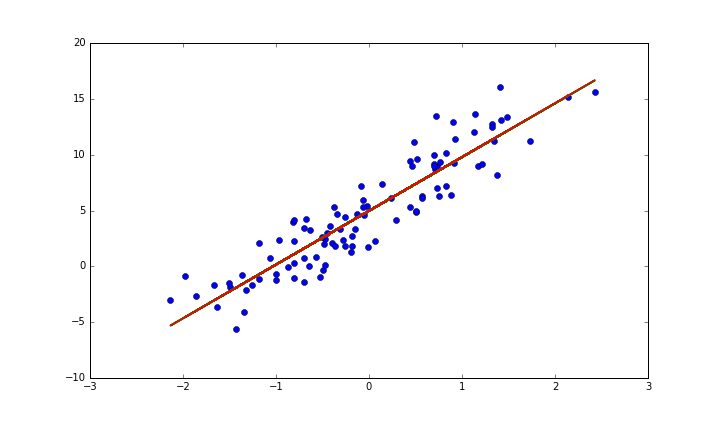
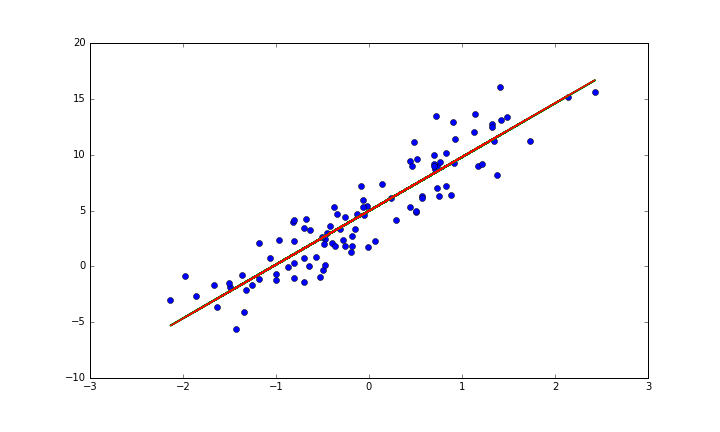
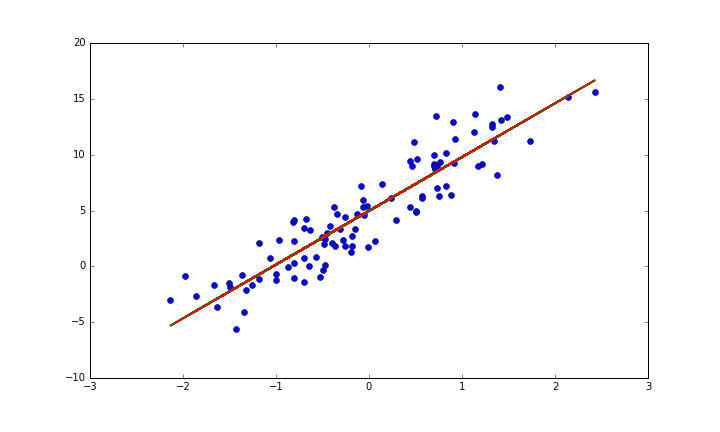
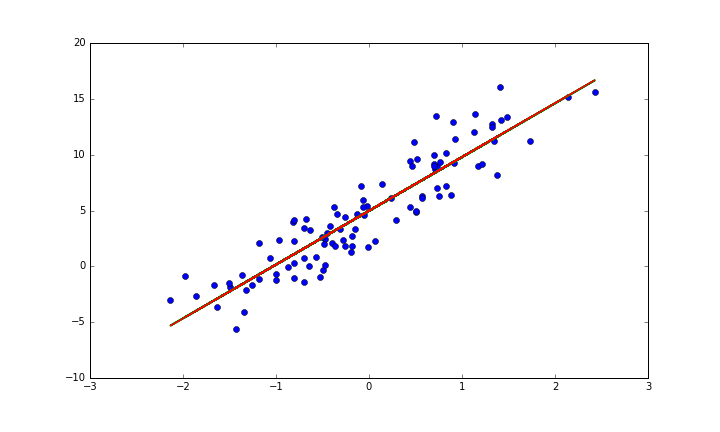
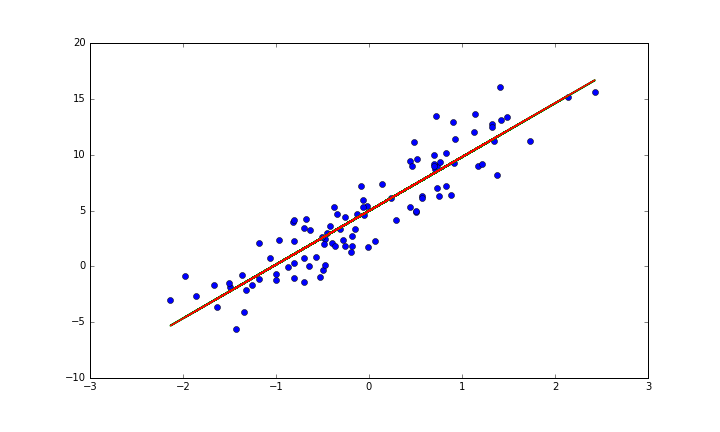
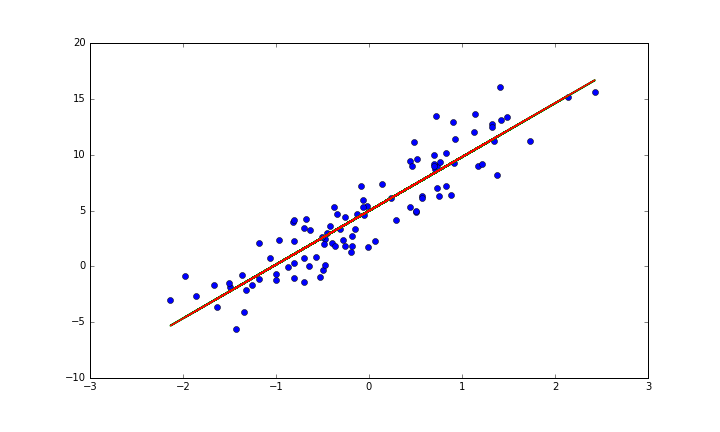
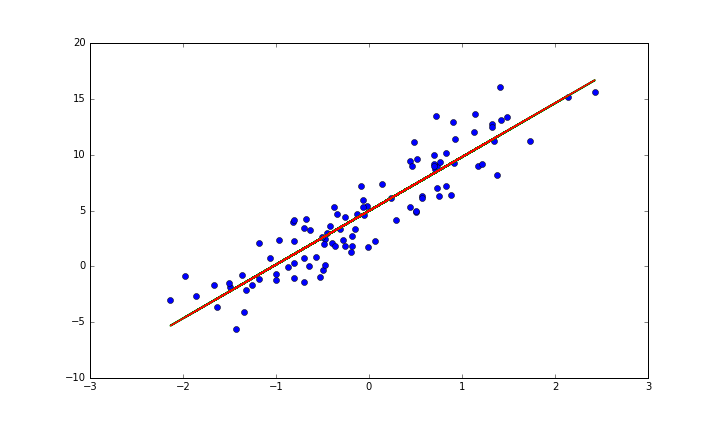
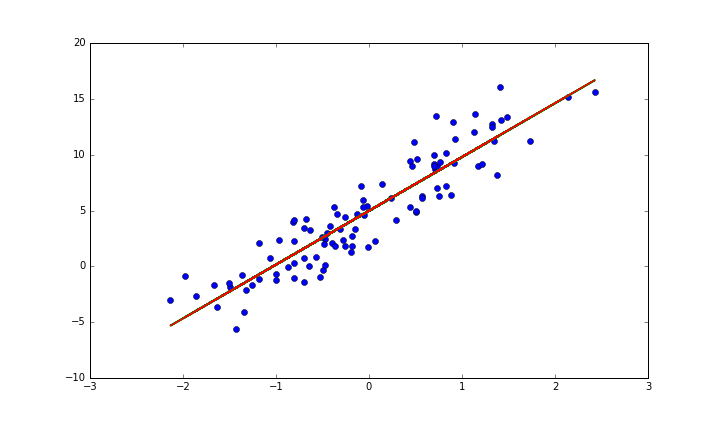
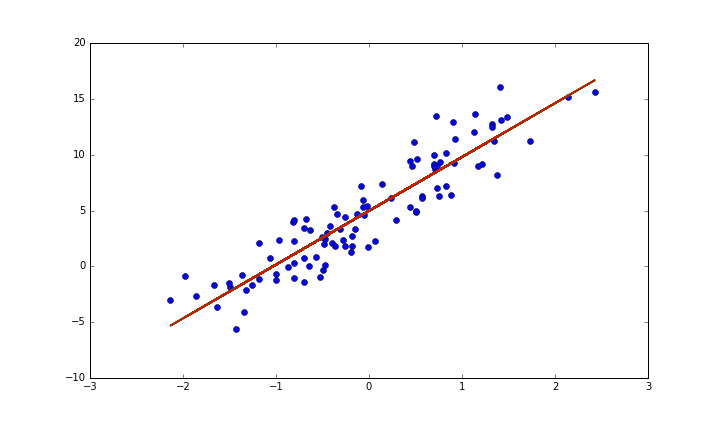
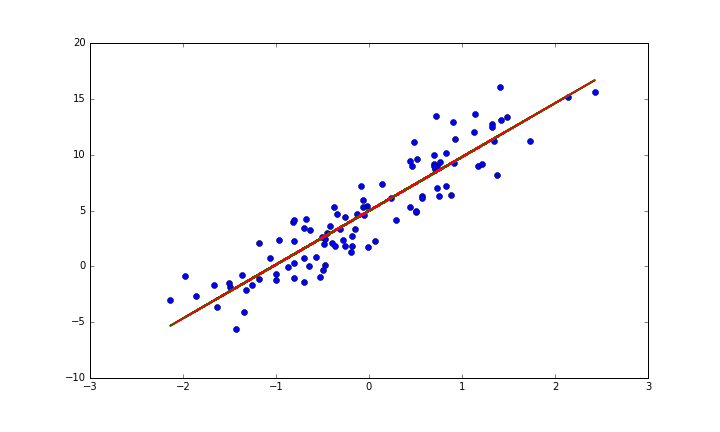
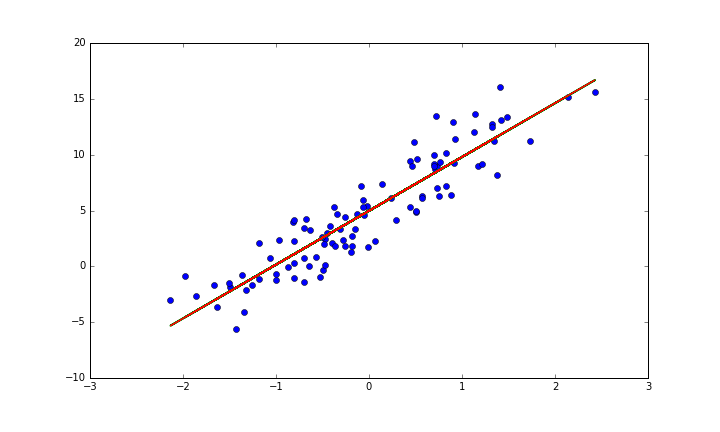
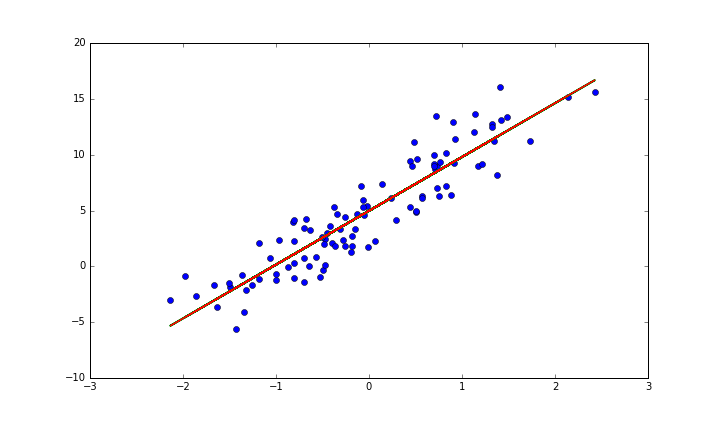
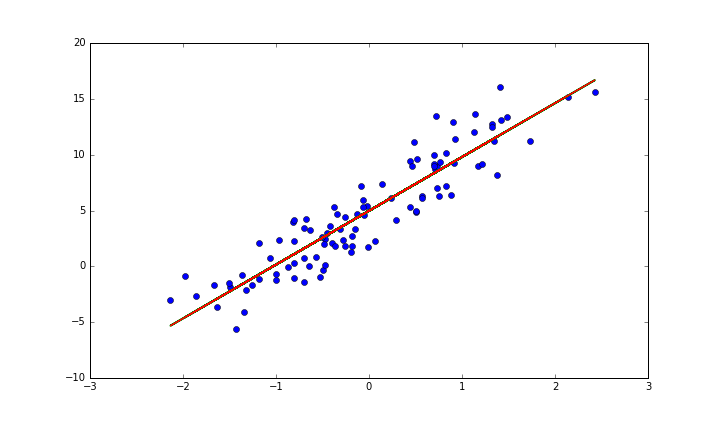
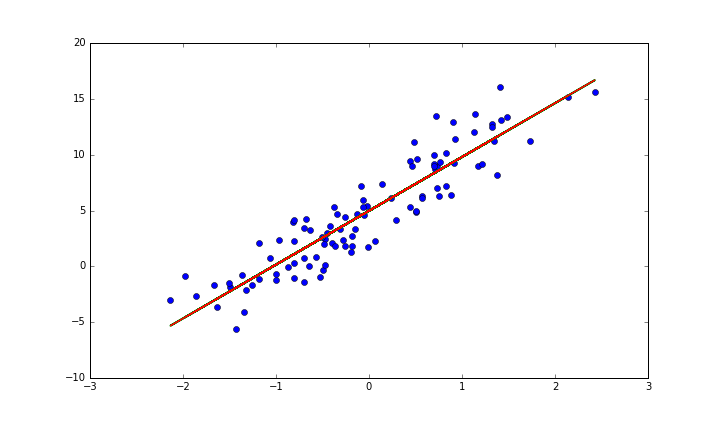
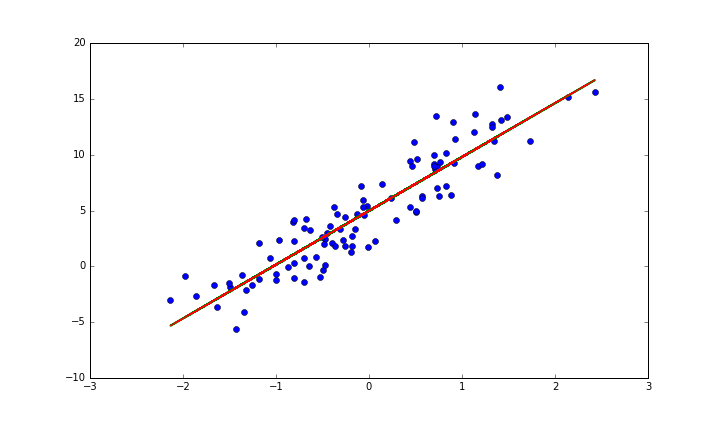
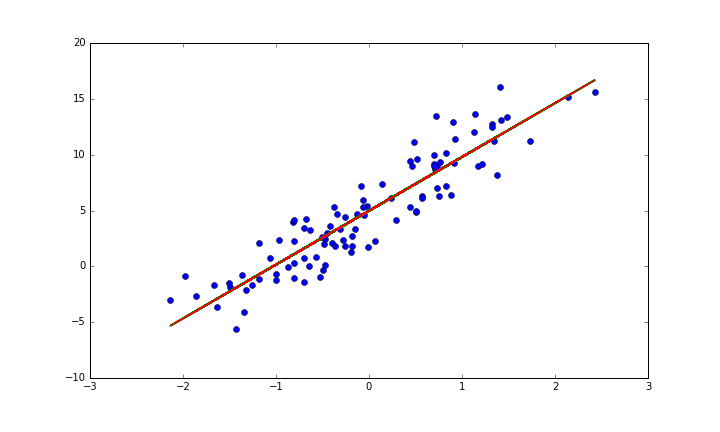
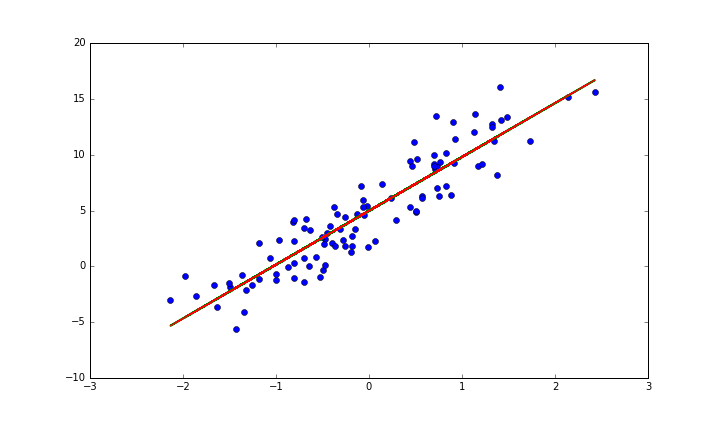
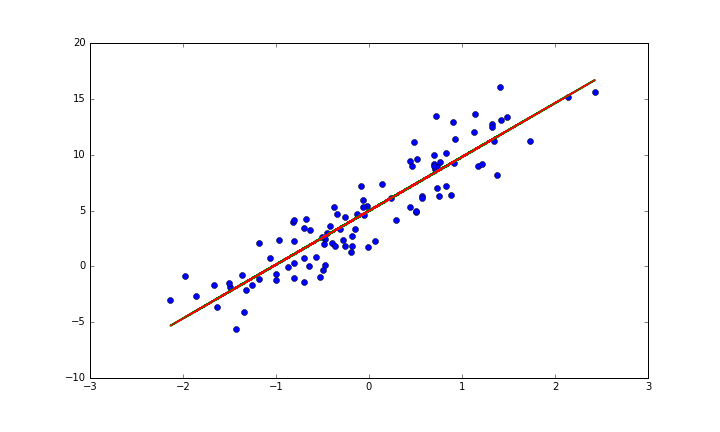
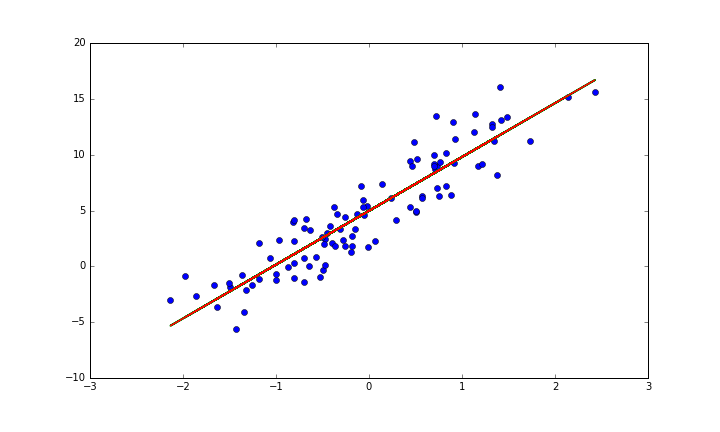
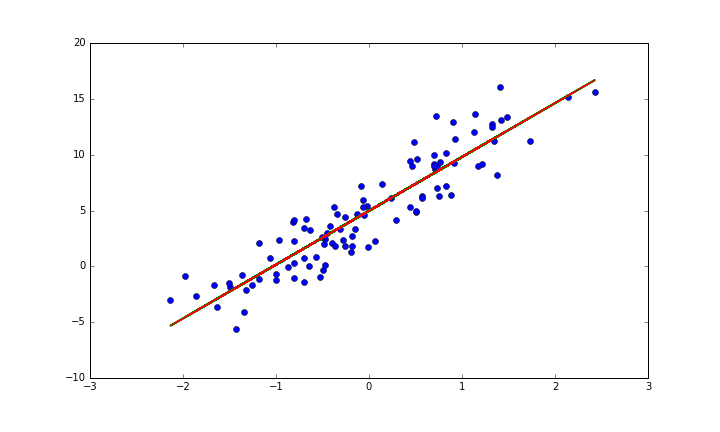
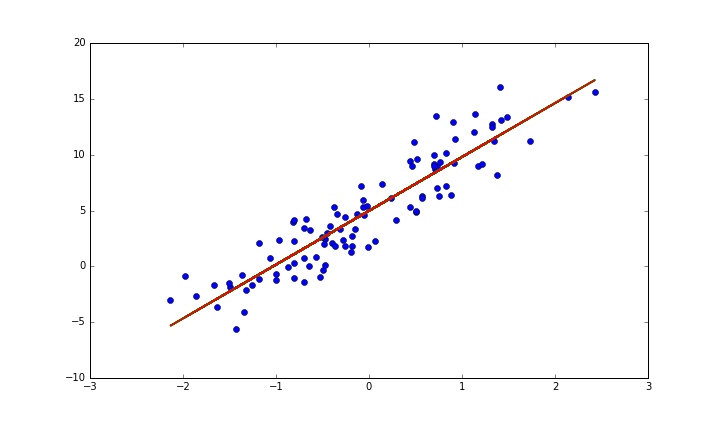
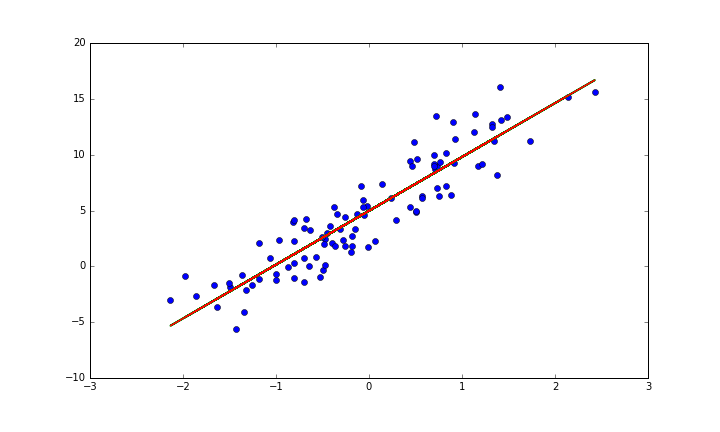
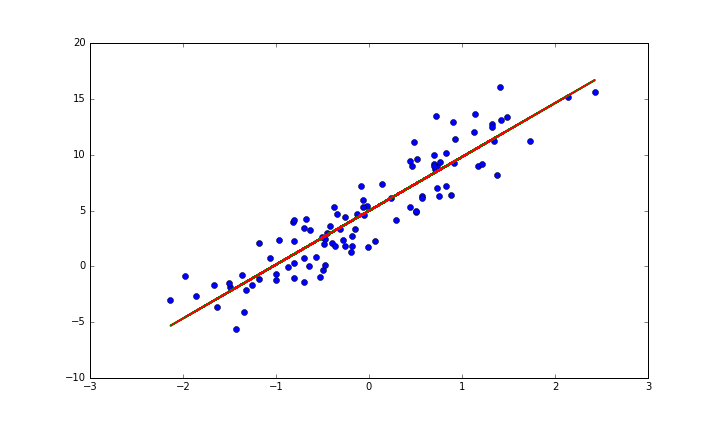
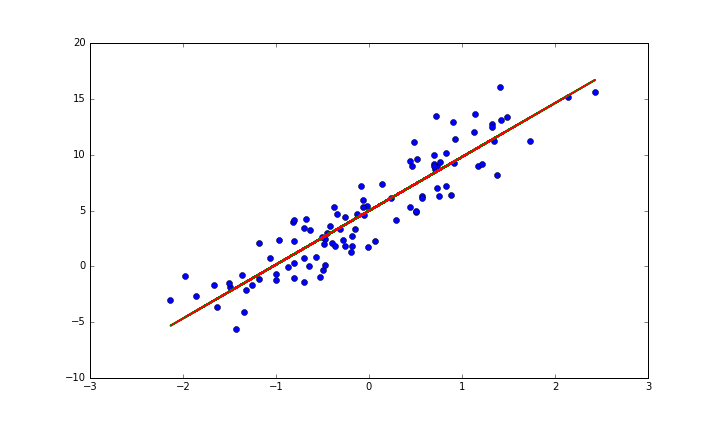
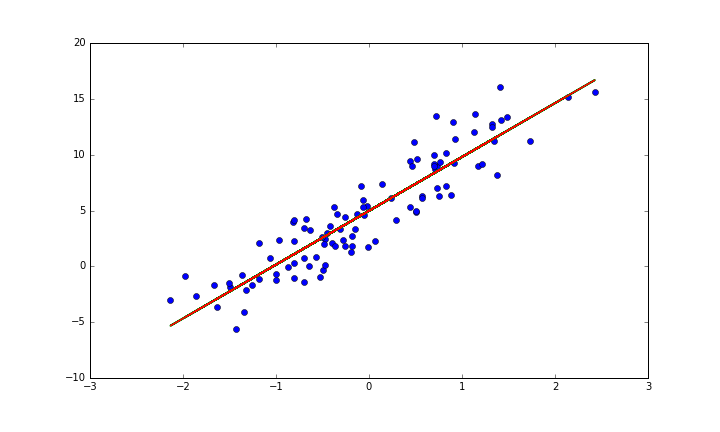
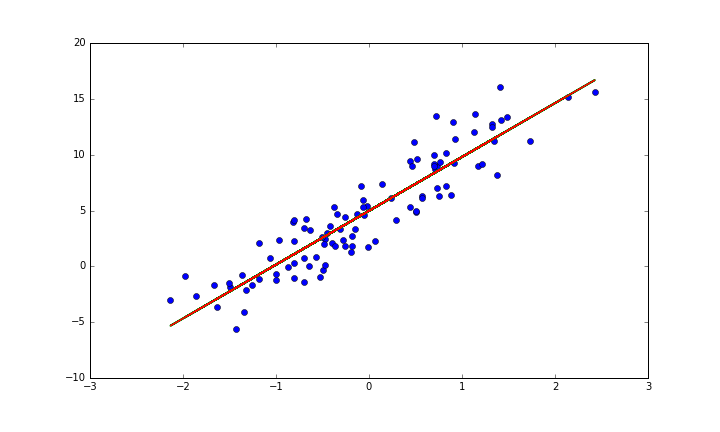
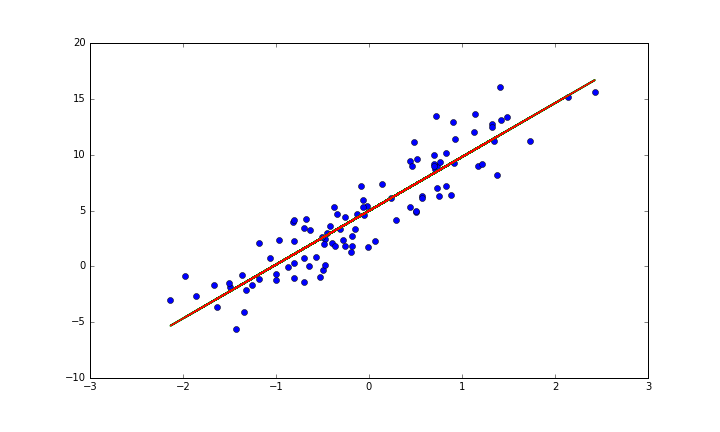
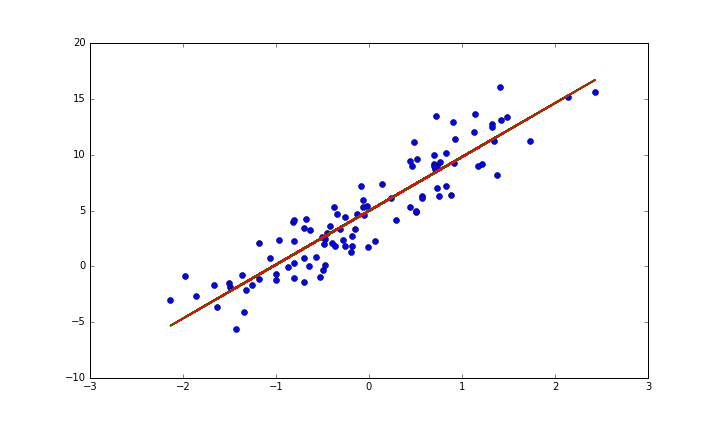
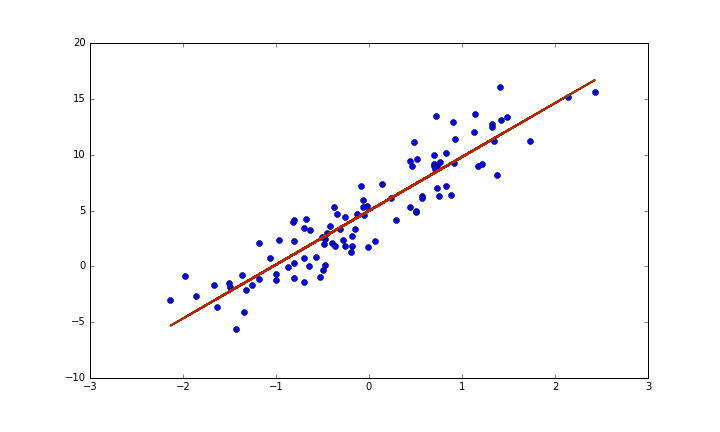
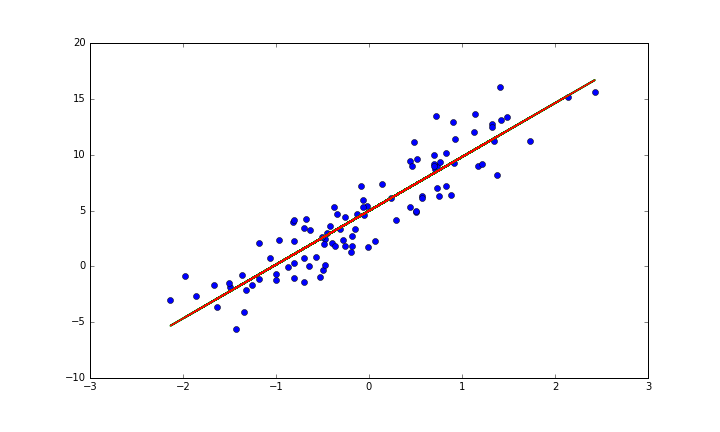
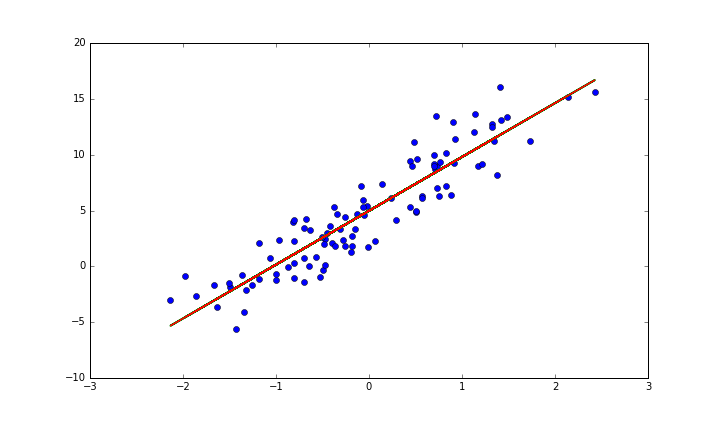
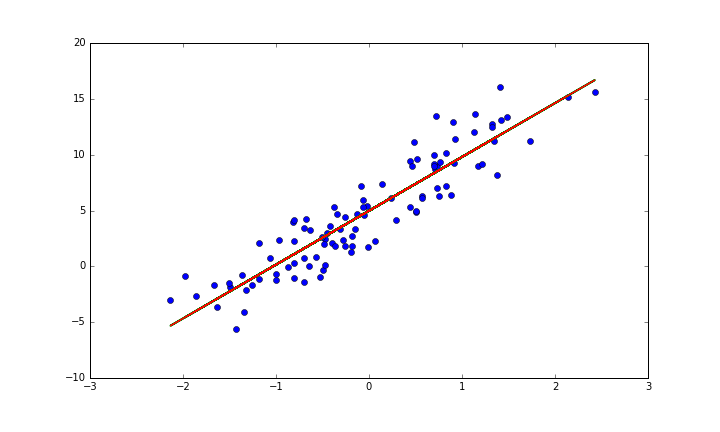
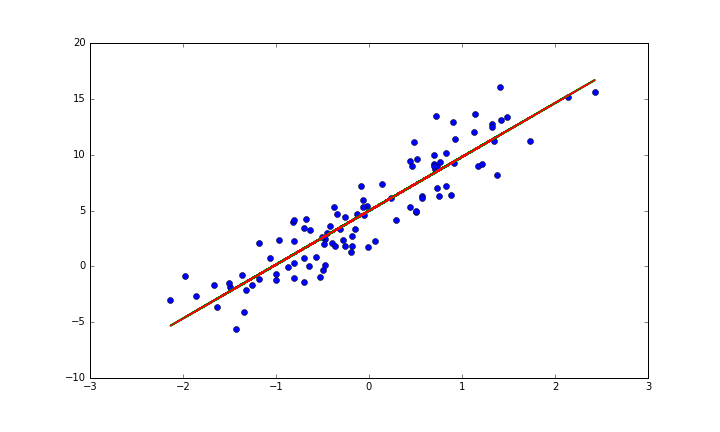

In [18]:
# functions for animation
def init():
    line.set_data([], [])
    return line,
def animate(i):
    theta = history[i].reshape((-1,1))
    line.set_data(X_train[:, 0], np.dot(X_train_bias, theta))
    return line,

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0], y_train, 'o')
line, = ax.plot([], [], lw=2)
plt.plot(X_train[:,0], best_fit_gradient_descent, 'k-', color = "r")

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(history), interval=100)